# Predicting Remodeled House Prices for Ames, Iowa

By Uriel Eckmann

![House_Renovating](photos/house_reno.jpeg)

## Problem Statement
The year is 2010. The stock market is beginning to recover, but the housing market has completely collapsed. No one is buying houses, and thousands of contractors are scrambling to find work. Luckily for them, Google has annouced that they will be opening their new headquarters right outside Ames, Iowa, so that they could literally be in the heart of the country. This has led to a large influx of people moving to the area hoping to capitalize. Ames has it's fair share of houses that need to be remodeled, or expanded, and it's a golden opportunity for contractors to flip houses quickly and for large profits. The issue is, where should they buy? What should they focus on when renovating these homes? These contractors are all new to the area, and they need help.

## Executive Summary
Our goal here at Data Homes LLC, is to predict what features of houses make them the most desirable, and to predict what refurbished homes will sell for, so contractors can decide which changes will be the most profitable. 
### _Workflow_
#### _Data Cleaning_
We here at Data Homes LLC have collected data from the Ames Assessor's office concerning homes sold from 2006 to 2010. We cleaned that data for our usage, and organized many of the different features of the houses into ordinal rankings in order to interpret them better. The assessors office scaled many of their different household characteristics in ways that were not condusive for our data - so we reinterpreted them to make them more useful for our models. There were also several empty entries that had to be considered, and filled in in the most ideal form for each feature. However, it should be noted that due to the assessors format of filling out features that were missing from homes, much time was devoted to differentiating missing values and missing features. 
#### _Data Exploration_
In the course of going through the data, we discovered the best neighborhoods to build in, what to look for in the surrounding area, which type of houses sell for higher prices, what key features the houses need, and which ones are just unnecessary. 
#### _Observations_
After building several models from our data to predict the house prices, we have determined some rather striking information about what will make the house worth more or less. For example, imitation stucco - very bad idea.

#### _Issues_
We will admit, our models are not perfect. But, if you sign up with us, we can give you much more information than you have now, and every day our models keep improving as we collect more data. It's already great and it's only going to get better, so sign on as client before it's too late!

## Table of Contents
### Contents:
- [Loading Data](#Loading-Data)
- [Data Cleaning](#Data-Cleaning)
    - [Dropping Rows](#Dropping-Rows)
    - [Handling Empty Cells](#Handling-Empty-Cells)
    - [Changing Column Types](#Changing-Column-Types)
        - [Ordinal Columns](#Ordinal-Columns)
        - [Year to Age](#Year-to-Age)
        - [Boolean Columns](#Boolean-Columns)
        - [Non-Numeric Columns](#Non-Numeric-Columns)
    - [Renaming Values](#Renaming-Values)
    - [Renaming Columns](#Renaming-Columns)
- [EDA](#EDA)
    - [General Information](#General-Information)
    - [Histograms](#Histograms)
    - [BoxPlots](#BoxPlots)
    - [ScatterPlots](#ScatterPlots)
    - [Heatmaps](#Heatmaps)
    - [Feature Engineering](#Feature-Engineering)
- [Model Preparation](#Model-Preparation)
- [Modeling](#Modeling)
    - [Baseline Model](#Baseline-Model)
    - [Linear Regression Model 1](#Linear-Regression-Model-1)
    - [Ridge Model 1](#Ridge-Model-1)
    - [LASSO Model 1](#LASSO-Model-1)
    - [Linear Regression Model 2](#Linear-Regression-Model-2)
    - [Ridge Model 2](#Ridge-Model-2)
    - [LASSO Model 2](#LASSO-Model-2)
    - [Linear Regression Model 3](#Linear-Regression-Model-3)
    - [Linear Regression Model 4](#Linear-Regression-Model-4)
- [Model Selection](#Model-Selection)
- [Model Evaluation](#Model-Evaluation)
    - [Regression Metrics](#Regression-Metrics)
    - [LINE Assumptions](#LINE-Assumptions)
    - [Log Transformation](#Log-Transformation)
         - [Model](#Model)
         - [Logarithmic Regression Metrics](#Logarithmic-Regression-Metrics)
         - [Logarithmic LINE Assumptions](#Logarithmic-LINE-Assumptions)
- [Conclusion](#Conclusion)
- [Recommendations](#Recommendations)
- [References](#References)

## Loading Packages and Data

Load in relevant packages.

In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # got this line of code from https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results

Load in our Training Data

In [473]:
# Given the nature of our dataset,  we'll include certain values and not assign them to Null
train = pd.read_csv("./datasets/train.csv", keep_default_na= False, na_values = [""])
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,nan,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.00,Gd,TA,CBlock,TA,TA,No,GLQ,533.00,Unf,0.00,192.00,725.00,GasA,Ex,Y,SBrkr,725,754,0,1479,0.00,0.00,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.00,RFn,2.00,475.00,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.00,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.00,Gd,TA,PConc,Gd,TA,No,GLQ,637.00,Unf,0.00,276.00,913.00,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.00,0.00,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.00,RFn,2.00,559.00,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.00,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,Gd,CBlock,TA,TA,No,GLQ,731.00,Unf,0.00,326.00,1057.00,GasA,TA,Y,SBrkr,1057,0,0,1057,1.00,0.00,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.00,Unf,1.00,246.00,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.00,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,Unf,0.00,Unf,0.00,384.00,384.00,GasA,Gd,Y,SBrkr,744,700,0,1444,0.00,0.00,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.00,Fin,2.00,400.00,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.00,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.00,TA,TA,PConc,Fa,Gd,No,Unf,0.00,Unf,0.00,676.00,676.00,GasA,TA,Y,SBrkr,831,614,0,1445,0.00,0.00,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.00,Unf,2.00,484.00,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [474]:
train.shape

(2051, 81)

Load in our Testing Data

In [475]:
test = pd.read_csv("./datasets/test.csv", keep_default_na= False, na_values = [""])
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.00,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.00,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910.00,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,nan,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.00,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977.00,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.00,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.00,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.00,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935.00,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,nan,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.00,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.00,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


In [476]:
test.shape

(878, 80)

## Data Dictionary

Our data dictionary can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

# Data Cleaning

### Dropping Rows

Our [Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) tells us that any rows with an above grade living area that is larger than 4000 square feet will be an outlier, and needs to be removed.

In [477]:
# Find all of our extra large houses
train.loc[train["Gr Liv Area"] > 4000, :]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.00,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.00,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.00,Unf,0.00,466.00,6110.00,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.00,0.00,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.00,Fin,2.00,1418.00,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.00,39290,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.00,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.00,Unf,0.00,1085.00,5095.00,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.00,1.00,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.00,Fin,3.00,1154.00,TA,TA,Y,546,484,0,0,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [478]:
# drop these rows
train.drop(index = (train.loc[train["Gr Liv Area"] > 4000, :].index), inplace = True)

After going through our training data, we discovered that there is one row with no information regarding the garage. Given this issue, we're going to drop this row.

In [479]:
# drop the row
train.drop(index = (train.loc[train["Garage Finish"].isna(), :].index[0]), inplace = True)

After going through our data, we found 2 outliers of lot area with exceptionally large lots. We're going to drop these 2 outliers. 

In [480]:
train.loc[train["Lot Area"] > 70_000, :]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,nan,159000,Pave,NA,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.00,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.00,Unf,0.00,747.00,1444.00,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.00,1.00,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.00,Fin,2.00,389.00,TA,TA,Y,0,98,0,0,0,0,NA,NA,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,nan,115149,Pave,NA,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.00,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.00,Unf,0.00,424.00,1643.00,GasA,TA,Y,SBrkr,1824,0,0,1824,1.00,0.00,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.00,Unf,2.00,739.00,TA,TA,Y,380,48,0,0,0,0,NA,NA,NA,0,6,2007,WD,302000
1854,2767,906475200,20,RL,62.00,70761,Pave,NA,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,655.00,Unf,0.00,878.00,1533.00,GasA,TA,Y,SBrkr,1533,0,0,1533,1.00,0.00,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.00,Unf,2.00,576.00,TA,TA,Y,200,54,0,0,0,0,NA,NA,NA,0,12,2006,WD,280000


In [481]:
# drop the row
train.drop(index = (train.loc[train["Lot Area"] > 70_000, :].index[:]), inplace = True)
# reset the index to avoid any further issues
train.reset_index(drop = True, inplace = True)
train.shape

(2045, 81)

### Handling Empty Cells

Check for Null Values in our Training Set.

In [482]:
print (f" There are {train.isna().sum().sum()} missing values from this dataset")

 There are 502 missing values from this dataset


In [483]:
train.isna().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       328
Lot Area             0
Street               0
Alley                0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            1
Bsmt Cond            1
Bsmt Exposure        4
BsmtFin Type 1       1
BsmtFin SF 1         1
BsmtFin Type 2       2
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical 

Check for Null Values in our test set.

In [484]:
print (f" There are {test.isna().sum().sum()} missing values from this dataset")

 There are 209 missing values from this dataset


Certain houses have no garage, and have null values for the year for the garage.We want to fill those in with zeroes before we fill in the nulls for any other houses with garages. Let's start by seeing how many houses have no garages.

In [485]:
train.loc[train["Garage Type"] == "NA", "Garage Type"].count()

113

Now, how many rows have null for Year Built?

In [486]:
train["Garage Yr Blt"].isna().sum()

113

Since we'll be changing the year built to age later by subtracting the year built from 2010, we'll set this value at 2010, so the age will be 0.

Now, we'll separate our various columns with Null Values into groups that will each be filled with a specific value.

In [487]:
# Certain columns impute "NA" for missiing features
fill_NA = [
    "Bsmt Qual",
    "Bsmt Cond",
    "Bsmt Exposure",
    "BsmtFin Type 1",
    "BsmtFin Type 2"]

# These columns impute 0 for missing features, such as square footage
fill_zero = [
    "Bsmt Full Bath",
    "Bsmt Half Bath",
    "BsmtFin SF 1",
    "BsmtFin SF 2",
    "Bsmt Unf SF",
    "Total Bsmt SF",
    "Mas Vnr Area"]

# This column uses none instead of "NA"
fill_none = ["Mas Vnr Type"]

# "This column will be filled with mean of the column instead of imputing that there is no front to the lot"
fill_mean = ["Lot Frontage"]

# as explained earlier, the garage year will be set at 2010
fill_2010 = ["Garage Yr Blt"]

dataframes = [train, test]

Next, we'll create a dictionary that has the input value as the key, and the lists as values.

In [488]:
dict_of_fill = {
    "NA"   : fill_NA,
    0      : fill_zero,
    "None" : fill_none,
    2010   : fill_2010,
    train["Lot Frontage"].mean() : fill_mean
               }

Create a function that will allow us to fill in our Null Values with the appropriate value.

In [489]:
def fill_nulls(dataframe, list_of_columns, value):
    for column in list_of_columns:
        dataframe[column].fillna(value = value, inplace = True)

Create a function that will apply our previous function on all of our lists.

In [490]:
def fill_df_nulls(df_list, fill_dict):
    for df in df_list:
        for k, v in fill_dict.items():
            fill_nulls(df, v, k)

In [491]:
fill_df_nulls(dataframes, dict_of_fill)

Check our current state of Null Values

In [492]:
print (train.isna().sum().sum())
print (test.isna().sum().sum())

0
2


Find our two test rows with Null Values.

In [493]:
# found this slice of code from 
# https://kite.com/python/answers/how-to-find-rows-with-nan-values-in-a-pandas-dataframe-in-python
is_null = test.isnull()
row_has_null = is_null.any(axis=1)
rows_with_null = test[row_has_null]

rows_with_null

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
634,1578,916386080,80,RL,73.00,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.00,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,5,2008,WD
764,1357,903426160,60,RM,57.00,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NA,Detchd,2010.00,NaN,1,360,NA,NA,Y,64,0,180,0,0,0,NA,MnPrv,Shed,1000,9,2008,WD


Row 634 is missing a value in the Electrical column and row 764 is missing a value in the Garage Finish column.

What should we fill in for our row that is missing Electrical information? Our Dataframe tells us that this house has Air conditioning. As such, let's see what would be the most likely candidate for the electrical system. 

In [494]:
test.groupby("Central Air")["Electrical"].value_counts()

Central Air  Electrical
N            SBrkr          32
             FuseA          13
             FuseF           9
             FuseP           1
Y            SBrkr         781
             FuseA          35
             FuseF           6
Name: Electrical, dtype: int64

Since the majority of houses with A/C have a standard circuit breaker, we'll assign it that.

In [495]:
fill_nulls(test, ["Electrical"], "SBrkr")

Finally, let's look into our row with a null value for the garage finish. We can determine the finish of the garage based on its size and type.

In [496]:
test.loc[(test["Garage Cars"] == 1) & (test["Garage Type"] == "Detchd"),"Garage Finish"].value_counts()

Unf    120
Fin      3
RFn      1
Name: Garage Finish, dtype: int64

This tells us that most detached, 1 car garages are Unfinished. As such, we'll fill our row with that, using our function.

In [497]:
fill_nulls(test, ["Garage Finish"], "Unf")

In [498]:
print (train.isna().sum().sum())
print (test.isna().sum().sum())

0
0


### Changing Column Types

#### Ordinal Columns
Now that we don't have any nulls, lets convert our ordinal columns into numerical values.

In [499]:
# All of these columns have some ordinal ranking for their values
ordinal_regular_columns = [
    "Exter Qual",
    "Exter Cond",
    "Bsmt Qual",
    "Bsmt Cond",
    "Bsmt Exposure",
    "BsmtFin Type 1",
    "BsmtFin Type 2",
    "Heating QC",
    "Electrical",
    "Kitchen Qual",
    "Functional",
    "Fireplace Qu",
    "Garage Finish",
    "Garage Qual",
    "Garage Cond",
    "Pool QC"
]

In [500]:
# These are most of the ordinal rankings that appear in our dataset. higher is better.
ordinal_values = {
    "Typ"  : 7.0,
    "Min1" : 6.0,
    "GLQ"  : 6.0,
    "Min2" : 5.0,
    "ALQ"  : 5.0,
    "Ex"   : 5.0,
    "Mod"  : 4.0,
    "BLQ"  : 4.0,
    "Gd"   : 4.0,
    "SBrkr": 4.0, 
    "Maj1" : 3.0,
    "Rec"  : 3.0,
    "Av"   : 3.0,
    "TA"   : 3.0,
    "Fin"  : 3.0,
    "FuseA": 3.0,
    "Maj2" : 2.0,
    "LwQ"  : 2.0,
    "Mn"   : 2.0,
    "Fa"   : 2.0,
    "FuseF": 2.0,
    "RFn"  : 2.0,
    "Sev"  : 1.0,
    "Unf"  : 1.0,
    "No"   : 1.0,
    "Po"   : 1.0,
    "FuseP": 1.0,
    "Mix"  : 0.0,
    "Sal"  : 0.0,
    "NA"   : 0.0
}

Build a function that takes each column in our previous list and applies the dictionary above to it, replacing all values as number values.

In [501]:
def ordinal_reassignment(dataframe, list_of_cols, dict_of_values):
    for column in list_of_cols:
        dataframe[column] = dataframe[column].map(dict_of_values)
#     return our column types to ensure that the switch has worked. 
    return dataframe[list_of_cols].dtypes

In [502]:
# apply to our train data
ordinal_reassignment(train, ordinal_regular_columns, ordinal_values)

Exter Qual        float64
Exter Cond        float64
Bsmt Qual         float64
Bsmt Cond         float64
Bsmt Exposure     float64
BsmtFin Type 1    float64
BsmtFin Type 2    float64
Heating QC        float64
Electrical        float64
Kitchen Qual      float64
Functional        float64
Fireplace Qu      float64
Garage Finish     float64
Garage Qual       float64
Garage Cond       float64
Pool QC           float64
dtype: object

In [503]:
# apply to our test data
ordinal_reassignment(test, ordinal_regular_columns, ordinal_values)

Exter Qual        float64
Exter Cond        float64
Bsmt Qual         float64
Bsmt Cond         float64
Bsmt Exposure     float64
BsmtFin Type 1    float64
BsmtFin Type 2    float64
Heating QC        float64
Electrical        float64
Kitchen Qual      float64
Functional        float64
Fireplace Qu      float64
Garage Finish     float64
Garage Qual       float64
Garage Cond       float64
Pool QC           float64
dtype: object

In [504]:
# Given the nature of some of the values in these rankings, I have separated them in a separate dictionary so as to not
# cause potential difficulties.
ordinal_fence_values = {
    "GdPrv" : 4.0,
    "MnPrv" : 3.0,
    "GdWo"  : 2.0,
    "MnWw"  : 1.0,
    "NA"    : 0.0
}

# Apply to our train data
ordinal_reassignment(train, ["Fence"], ordinal_fence_values)

Fence    float64
dtype: object

In [505]:
# Apply to our test data
ordinal_reassignment(test, ["Fence"], ordinal_fence_values)

Fence    float64
dtype: object

#### Year to Age

We have several columns that record the year a house or garage was built or remodeled. This information is useful, but is more useful to our model in terms of age, as opposed to year. Let's convert these columns. It's also important to note that we have one row with a value that is incorrect, and will need to be fixed. 

In [506]:
train.loc[1698, "Garage Yr Blt"]

1962.0

As we can see, this value makes no sense. Let's fix it.

In [507]:
# Assign it the value of 2007 which makes more sense
train.loc[1698, "Garage Yr Blt"] = 2007

Now, let's create a function that will convert the various years built, into ages.

In [508]:
def year_to_age(df, list_of_cols):
    for column in list_of_cols:
        df[column] = 2010 - df[column]
    return df[list_of_cols].mean()

In [509]:
year_columns = [
    "Year Built",
    "Year Remod/Add",
    "Garage Yr Blt"
]

# Apply to our train data
year_to_age(train, year_columns)

Year Built       38.30
Year Remod/Add   25.86
Garage Yr Blt    29.55
dtype: float64

In [510]:
# Apply to our test data
year_to_age(test, year_columns)

Year Built       39.51
Year Remod/Add   25.58
Garage Yr Blt    31.54
dtype: float64

These columns will have to be renamed to reflect their new values.

#### Boolean Columns
Convert our Boolean columns into ones and zeroes.

In [511]:
boolean_columns = [
    "Street",
    "Central Air"
]

boolean_values = {
    "Y" : 1,
    "Pave" : 1, 
    "N" : 0,
    "Grvl" : 0
}

In [512]:
# Apply to our train data
ordinal_reassignment(train, boolean_columns, boolean_values)

Street         int64
Central Air    int64
dtype: object

In [513]:
# Apply to our test data
ordinal_reassignment(test, boolean_columns, boolean_values)

Street         int64
Central Air    int64
dtype: object

#### Non-Numeric Columns

Some of our columns are listed as numbers despite being categorical in nature.

In [514]:
# Build a function that converts a column into a string
def string_columns(df, list_of_cols):
    for column in list_of_cols:
        df[column] = df[column].apply(str)
    return df[list_of_cols].dtypes

In [515]:
string_columns_list = [
    "Id",
    "PID",
]

# Apply to our train data
string_columns(train, string_columns_list)

Id     object
PID    object
dtype: object

In [516]:
# Apply to our test data
string_columns(test, string_columns_list)

Id     object
PID    object
dtype: object

### Renaming Values

Some of our categorical columns will require renaming the values in order to make them more human readable.

In [517]:
def rename_values(df, dictionary):
    for k,v in dictionary.items():
        df[k] = df[k].map(v)
    

In [518]:
# The dictionary for the type of house, "MS SubClass"
house_class_names = {
    20 : "1-Story After 1945",
    30 : "1-Story Before 1945",
    40 : "1-Story With Finished Attic",
    45 : "1-1/2 Story - Unfinished",
    50 : "1-1/2 Story - Finished",
    60 : "2-Story After 1945",
    70 : "2-Story Before 1945",
    75 : "2-1/2 Story",
    80 : "Split OR Multi-Level",
    85 : "Split Foyer",
    90 : "Duplex",
    120: "1-Story Planned Unit Development",
    150: "1-1/2 Story Planned Unit Development",
    160: "2-Story Planned Unit Development",
    180: "Multilevel Planned Unit Development",
    190: "2 Family Conversion"
}

# The dictionary for the neighborhoods, "Neighborhood"
neighborhood_names = {
    "Blmngtn" : "Bloomington Heights",
    "Blueste" : "Bluestem",
    "BrDale"  : "Briardale",
    "BrkSide" : "Brookside",
    "ClearCr" : "Clear Creek",
    "CollgCr" : "College Creek",
    "Crawfor" : "Crawford",
    "Greens"  : "Greens",
    "GrnHill" : "Green Hills",
    "IDOTRR"  : "Iowa DOT and Rail Road",
    "Landmrk" : "Landmark",
    "MeadowV" : "Meadow Village",
    "Mitchel" : "Mitchell",
    "NAmes"   : "North Ames",
    "NoRidge" : "Northridge",
    "NPkVill" : "Northpark Villa",
    "NridgHt" : "Northridge Heights",
    "NWAmes"  : "Northwest Ames",
    "OldTown" : "Old Town",
    "SWISU" : "South & West of Iowa State University",
    "SawyerW" : "Sawyer West",
    "Somerst" : "Somerset",
    "StoneBr" : "Stone Brook",
    "Timber"  : "Timberland",
    "Edwards" : "Edwards",
    "Gilbert" : "Gilbert",
    "Sawyer"  : "Sawyer",
    "Veenker" : "Veenker",
    
}

# The dictionary for the Zone types, "MS Zoning"
house_zone_names = {
    "A (agr)" : "Agriculture",
    "C (all)" : "Commercial",
    "FV"      : "Floating Village Residential",
    "I (all)" : "Industrial",
    "RH"      : "Residential High Density",
    "RL"      : "Residential Low Density",
    "RP"      : "Residential Low Density Park",
    "RM"      : "Residential Medium Density"
}

# the dictionary for the lot shape, "Lot Shape"
lot_shape = {
    "Reg" : "Regular",
    "IR1" : "Slightly irregular",
    "IR2" : "Moderately Irregular",
    "IR3" : "Irregular"
}

# The dictionary for the land contour, "Land Contour"
land_contour = {
    "Lvl" : "Level",
    "Bnk" : "Banked",
    "HLS" : "Hillside",
    "Low" : "Depression" 
}

# The dictionary for the utilities, "Utilities"
utilities = {
    "AllPub" : "All Utilities",
    "NoSewr" : "No Sewer",
    "NoSeWa" : "No Water",
    "ELO"    : "Electricity only"
}

# The dictionary for the alley, "Alley"
alley = {
    "Grvl" : "Gravel",
    "Pave" : "Paved",
    "NA"   : "No Alley"
}

# The dictionary for the Lot Configuration, "Lot Config"
lot_config = {
    "Inside" : "Inside Lot",
    "Corner" : "Corner Lot",
    "CulDSac": "Cul-De-Sac",
    "FR2"    : "Front on 2 Sides",
    "FR3"    : "Front on 3 Sides"
}

# The dictionary for the Land Slope, "Land Slope"
land_slope = {
    "Gtl" : "Gentle",
    "Mod" : "Moderate",
    "Sev" : "Severe"
}

# The dictionary for the Main Road Proximity, "Condition 1" & "Condition 2"
road_prox = {
    "Artery" : "Adjacent to Main Street",
    "Feedr"  : "Adjacent to Feeder Street",
    "Norm"   : "Normal",
    "RRNn"   : "Within 200 Feet of North-South Railroad",
    "RRAn"   : "Adjacent to North-South Railroad",
    "PosN"   : "Near Positive Feature",
    "PosA"   : "Adjacent to Postive Feature",
    "RRNe"   : "Within 200 Feet of East-West Railroad",
    "RRAe"   : "Adjacent to East-West Railroad"
}

# The dictionary for the House Type, "Bldg Type"
house_type = {
    "1Fam"  : "Single-Family Detached",
    "2fmCon": "Two-family Conversion",
    "Duplex" : "Duplex",
    "Twnhs" : "Townhouse",
    "TwnhsE": "Townhouse End Unit",
}

# The dictionary for the House Type, "House Style"
house_style = {
    "1Story" : "1 Story",
    "1.5Fin" : "1.5 Story - 2nd Level Finished",
    "1.5Unf" : "1.5 Story - 2nd Level Unfinished",
    "2Story" : "2 Story",
    "2.5Fin" : "2.5 Story - 2nd Level Finished",
    "2.5Unf" : "2.5 Story - 2nd Level Unfinished",
    "SFoyer" : "Split Foyer",
    "SLvl"   : "Split Level"
}

# The dictionary for the Roof Material,"Roof Matl"
roof_material ={
    "ClyTile" : "Clay or Tile",
    "CompShg" : "Standard Shingle",
    "Membran" : "Membrane",
    "Metal"   : "Metal",
    "Roll"    : "Roll",
    "Tar&Grv" : "Gravel & Tar",
    "WdShake" : "Wood Shakes",
    "WdShngl" : "Wood Shingles"
}

# The dictionary for the Exterior Material,"Exterior 1st", "Exterior 2nd", & "Msr Vnr Type"
ext_cover = {
    "AsbShng" : "Asbestos Shingles",
    "AsphShn" : "Asphalt Shingles",
    "BrkComm" : "Brick Common",
    "Brk Cmn" : "Brick Common",
    "BrkCmn" : "Brick Common",
    "BrkFace" : "Brick Face",
    "CBlock"  : "Cinder Block",
    "CemntBd" : "Cement Board",
    "CmentBd" : "Cement Board",
    "HdBoard" : "Hard Board",
    "ImStucc" : "Imitation Stucco",
    "MetalSd" : "Metal Siding",
    "Other"   : "Other",
    "Plywood" : "Plywood",
    "PreCast" : "PreCast",
    "Stone"   : "Stone",
    "Stucco"  : "Stucco",
    "VinylSd" : "Vinyl Siding",
    "Wd Shng" : "Wood Siding",
    "Wd Sdng" : "Wood Siding",
    "WdShing" : "Wood Shingles",
    "None"    : "None"
}

# The dictionary for the foundation, "Foundation"
foundation = {
    "BrkTil" : "Brick & Tile",
    "CBlock" : "Cinder Block",
    "PConc"  : "Poured Contrete",
    "Slab"   : "Slab",
    "Stone"  : "Stone",
    "Wood"   : "Wood"
}

# The dictionary for the heating, "Heating"
heating = {
    "Floor" : "Floor Furnace",
    "GasA"  : "Gas Forced Furnace",
    "GasW"  : "Gas hot Water or Steam Heat",
    "Grav"  : "Gravity Furnace",
    "OthW"  : "Non-Gas Hot Water or steam heat",
    "Wall"  : "Wall Furnace"
}

# The dictionary for the garage type, "Garage Type"
garage_type = {
    "2Types" : "More than one Type",
    "Attchd" : "Attached",
    "Basment": "Basement Garage",
    "BuiltIn": "Built-In",
    "CarPort": "Car Port",
    "Detchd" : "Detached",
    "NA"     : "No Garage"
}

# The dictionary for the miscellaneous, "Misc Feature"
misc = {
    "Elev" : "Elevator",
    "Gar2" : "2nd Garage",
    "Othr" : "Other",
    "Shed" : "Shed",
    "TenC" : "Tennis Court",
    "NA"   : "None"
}

# The dictionary for the sale type, "Sale Type"
sale_type = {
    "WD "  : "Warranty Deed - Conventional",
    "CWD"  : "Warranty Deed - Cash",
    "VWD"  : "Warranty Deed - VA Loan",
    "New"  : "Newly Constructed Home",
    "COD"  : "Court Officer Deed/Estate",
    "Con"  : "Contract 15% Down",
    "ConLw": "Contract Low Down Payment & Low Interest",
    "ConLI": "Contract Low Interest",
    "ConLD": "Contract Low Down",
    "Oth"  : "Other"
}

# This dictionary has our column names as the keys and the dictionaries of values as the values
columns_and_dicts = {
    "MS SubClass" : house_class_names,
    "Neighborhood": neighborhood_names,
    "MS Zoning"   : house_zone_names,
    "Lot Shape"   : lot_shape,
    "Land Contour": land_contour,
    "Utilities"   : utilities,
    "Alley"       : alley,
    "Lot Config"  : lot_config,
    "Land Slope"  : land_slope,
    "Condition 1" : road_prox,
    "Condition 2" : road_prox,
    "Bldg Type"   : house_type,
    "House Style" : house_style,
    "Roof Matl"   : roof_material,
    "Exterior 1st": ext_cover,
    "Exterior 2nd": ext_cover,
    "Mas Vnr Type": ext_cover,
    "Foundation"  : foundation,
    "Heating"     : heating,
    "Garage Type" : garage_type,
    "Misc Feature": misc,
    "Sale Type"   : sale_type
    
    
}

In [519]:
# Apply our function to the train set
rename_values(train, columns_and_dicts)

# Apply our function to the test set
rename_values(test, columns_and_dicts)

### Renaming Columns

Now that we've assigned all of our ordinal values, and renamed our categorical values, let's change some column names that either don't make sense, or need to be adjusted.

In [520]:
# Apply to our training set
train.rename(columns = {
    "Street": "Street_paved",
    "Condition 1" : "RR or Road Prox1",
    "Condition 2" : "RR or Road Prox2",
    "Fence" : "Fence Qual",
    "Year Built" : "Total Age",
    "Year Remod/Add" : "Remodel Age",
    "Garage Yr Blt" : "Garage Age",
    "3Ssn Porch" : "Three Season Porch"
    }, inplace = True)

# Apply to our test set
test.rename(columns = {
    "Street": "Street_paved",
    "Condition 1" : "RR or Road Prox1",
    "Condition 2" : "RR or Road Prox2",
    "Fence" : "Fence Qual",   
    "Year Built" : "Total Age",
    "Year Remod/Add" : "Remodel Age",
    "Garage Yr Blt" : "Garage Age",
    "3Ssn Porch" : "Three Season Porch"
    }, inplace = True)

Rename our column names using snake case

In [521]:
# Apply to the training set
train.columns = train.columns.str.lower().str.replace(" ", "_")

In [522]:
# Apply to the test set
test.columns = test.columns.str.lower().str.replace(" ", "_")

## EDA

### General Information

In [523]:
train.describe()

,lot_frontage,lot_area,street_paved,overall_qual,overall_cond,total_age,remodel_age,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_age,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,three_season_porch,screen_porch,pool_area,pool_qc,fence_qual,misc_val,mo_sold,yr_sold,saleprice
count,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00,2045.00
mean,68.89,9871.20,1.00,6.11,5.56,38.30,25.86,97.53,3.40,3.09,3.49,2.93,1.62,3.56,437.14,1.28,48.08,567.20,1052.42,4.16,0.93,3.89,1160.31,329.06,5.53,1494.89,0.43,0.06,1.58,0.37,2.84,1.04,3.51,6.43,6.84,0.59,1.76,29.55,1.72,1.78,472.74,2.80,2.81,93.37,47.22,22.53,2.60,16.56,2.17,0.01,0.58,43.17,6.22,2007.78,181340.15
std,20.60,5066.02,0.06,1.42,1.11,30.18,21.04,171.79,0.59,0.37,0.90,0.57,1.07,2.13,439.86,0.95,165.19,445.40,426.79,0.96,0.25,0.40,378.98,425.63,51.14,485.94,0.52,0.25,0.55,0.50,0.83,0.21,0.66,1.55,0.68,0.63,1.81,25.76,0.90,0.76,214.56,0.72,0.71,128.11,65.90,59.78,25.27,57.45,36.33,0.22,1.21,434.79,2.74,1.31,79267.59
min,21.00,1300.00,0.00,1.00,1.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,-197.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,12789.00
25%,60.00,7500.00,1.00,5.00,5.00,9.00,6.00,0.00,3.00,3.00,3.00,3.00,1.00,1.00,0.00,1.00,0.00,219.00,793.00,3.00,1.00,4.00,879.00,0.00,0.00,1128.00,0.00,0.00,1.00,0.00,2.00,1.00,3.00,5.00,7.00,0.00,0.00,6.00,1.00,1.00,319.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,129500.00
50%,68.89,9400.00,1.00,6.00,5.00,36.00,17.00,0.00,3.00,3.00,4.00,3.00,1.00,4.00,368.00,1.00,0.00,474.00,994.00,5.00,1.00,4.00,1092.00,0.00,0.00,1442.00,0.00,0.00,2.00,0.00,3.00,1.00,3.00,6.00,7.00,1.00,1.00,25.00,2.00,2.00,480.00,3.00,3.00,0.00,26.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,162500.00
75%,78.00,11500.00,1.00,7.00,6.00,57.00,46.00,158.00,4.00,3.00,4.00,3.00,2.00,6.00,733.00,1.00,0.00,811.00,1314.00,5.00,1.00,4.00,1402.00,690.00,0.00,1728.00,1.00,0.00,2.00,1.00,3.00,1.00,4.00,7.00,7.00,1.00,4.00,48.00,2.00,2.00,576.00,3.00,3.00,168.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,313.00,57200.00,1.00,10.00,9.00,138.00,60.00,1600.00,5.00,5.00,5.00,5.00,4.00,6.00,2188.00,6.00,1474.00,2336.00,3206.00,5.00,1.00,4.00,3820.00,1862.00,1064.00,3820.00,3.00,2.00,4.00,2.00,8.00,3.00,5.00,14.00,7.00,4.00,5.00,115.00,3.00,5.00,1356.00,5.00,5.00,1424.00,547.00,432.00,508.00,490.00,800.00,5.00,4.00,12500.00,12.00,2010.00,611657.00


This dataframe helps us check and ensure that all of our numerical columns have good information, and we can use this information in our model.

In [524]:
test.describe()

,lot_frontage,lot_area,street_paved,overall_qual,overall_cond,total_age,remodel_age,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_age,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,three_season_porch,screen_porch,pool_area,pool_qc,fence_qual,misc_val,mo_sold,yr_sold
count,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00,878.00
mean,69.43,10307.03,0.99,6.05,5.57,39.51,25.58,106.12,3.38,3.08,3.45,2.91,1.63,3.51,441.33,1.28,53.90,539.13,1034.36,4.13,0.94,3.91,1145.79,348.40,2.73,1496.91,0.44,0.06,1.54,0.40,2.88,1.05,3.50,6.45,6.85,0.62,1.78,31.54,1.71,1.74,470.36,2.80,2.81,93.43,47.07,24.06,2.60,14.83,1.88,0.02,0.59,48.50,6.20,2007.83
std,21.28,10002.67,0.08,1.37,1.13,30.40,20.45,187.09,0.56,0.37,0.91,0.57,1.07,2.09,438.46,0.98,178.63,426.17,413.45,0.94,0.24,0.35,375.26,432.99,32.57,506.47,0.53,0.23,0.56,0.51,0.83,0.22,0.66,1.60,0.61,0.67,1.80,26.07,0.90,0.75,212.73,0.70,0.70,121.18,68.18,73.25,24.96,53.00,29.92,0.31,1.22,550.17,2.64,1.33
min,21.00,1477.00,0.00,2.00,1.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1.00,407.00,0.00,0.00,407.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,60.00,7297.25,1.00,5.00,5.00,10.25,7.00,0.00,3.00,3.00,3.00,3.00,1.00,1.00,0.00,1.00,0.00,216.00,789.00,3.00,1.00,4.00,864.00,0.00,0.00,1114.00,0.00,0.00,1.00,0.00,2.00,1.00,3.00,5.00,7.00,0.00,0.00,7.00,1.00,1.00,322.50,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00
50%,68.89,9446.00,1.00,6.00,5.00,38.00,18.00,0.00,3.00,3.00,3.00,3.00,1.00,4.00,373.00,1.00,0.00,452.00,975.00,4.00,1.00,4.00,1063.00,0.00,0.00,1436.00,0.00,0.00,2.00,0.00,3.00,1.00,3.00,6.00,7.00,1.00,2.00,30.00,2.00,2.00,473.00,3.00,3.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,78.00,11589.00,1.00,7.00,6.00,56.00,43.00,171.75,4.00,3.00,4.00,3.00,2.00,6.00,734.75,1.00,0.00,780.00,1247.00,5.00,1.00,4.00,1358.00,720.00,0.00,1779.00,1.00,0.00,2.00,1.00,3.00,1.00,4.00,7.00,7.00,1.00,4.00,50.00,2.00,2.00,576.00,3.00,3.00,170.75,69.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,182.00,215245.00,1.00,10.00,9.00,130.00,60.00,1378.00,5.00,5.00,5.00,4.00,4.00,6.00,2288.00,6.00,1526.00,2046.00,2630.00,5.00,1.00,4.00,2674.00,2065.00,481.00,4476.00,2.00,1.00,4.00,2.00,6.00,3.00,5.00,12.00,7.00,3.00,5.00,110.00,3.00,4.00,1488.00,4.00,5.00,690.00,742.00,1012.00,360.00,576.00,555.00,5.00,4.00,15500.00,12.00,2010.00


This dataframe helps us do one final check to ensure our dataframe has no further issues.

In [525]:
print(f"The Average sale price for homes in Ames, Iowa is: ${round(train['saleprice'].mean(),2)}")
print(f"The Average sale price for remodeled homes in Ames, Iowa is: ${round(train.loc[train['remodel_age'] <= 20, 'saleprice'].mean(),2)}")
print(f"The Average sale price for antique homes in Ames, Iowa is: ${round(train.loc[train['total_age'] > 50, 'saleprice'].mean(),2)}")
print(f"{round(((train.loc[train['total_age'] > 50, :].count()[0])/train.shape[0]) *100, 2)} percent of the houses in Ames Iowa, are older than 50 years")

The Average sale price for homes in Ames, Iowa is: $181340.15
The Average sale price for remodeled homes in Ames, Iowa is: $218240.1
The Average sale price for antique homes in Ames, Iowa is: $131292.26
33.25 percent of the houses in Ames Iowa, are older than 50 years


### Histograms

Let's look into our target, house prices. Are they normally distributed?

Build a function that will plot a histogram for us, and all we need to supply are labels and columns.

In [526]:
def my_histogram(df, column, title, x_label, y_label):
    plt.figure(figsize = (10, 8))

    plt.hist(df[column], bins = 40)
    plt.axvline(df[column].mean(), color = "red")
    plt.title(title, fontsize = 24)
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label, fontsize = 18);

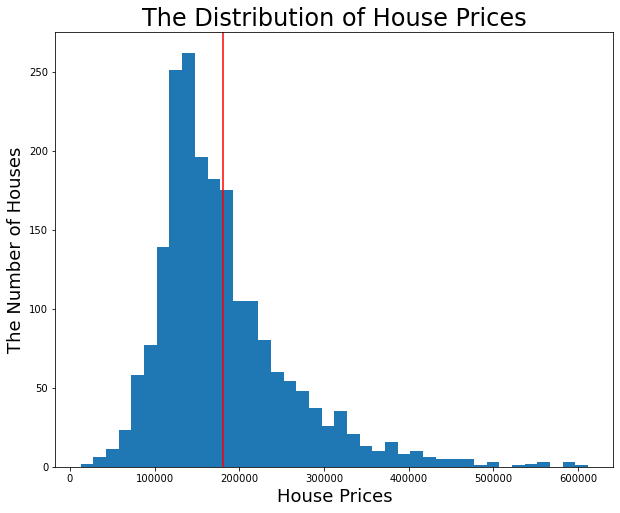

In [527]:
my_histogram(train, 
             "saleprice", 
             "The Distribution of House Prices", 
             "House Prices", 
             "The Number of Houses")

__Interpretation:__ As we can see, this distribution is close to being normal, with some outlier houses on the more expensive side, making this a  right skewed distribution. 

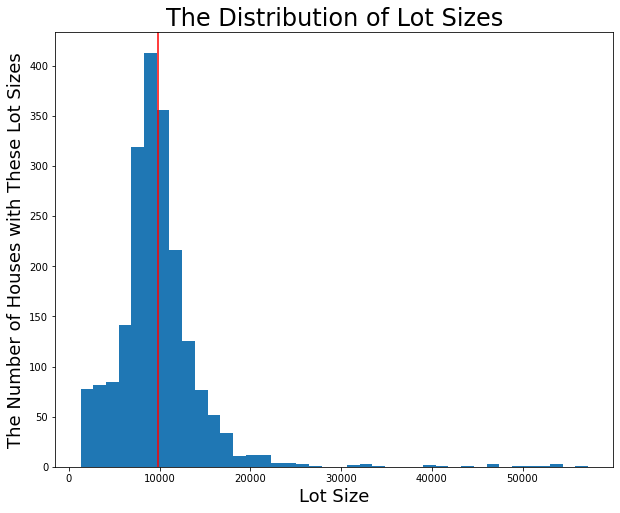

In [528]:
my_histogram(train, 
             "lot_area", 
             "The Distribution of Lot Sizes", 
             "Lot Size", 
             "The Number of Houses with These Lot Sizes")

__Interpretation:__ As expected, the lot size is a bit right skewed as lots have a minimum size and can only get bigger from there.

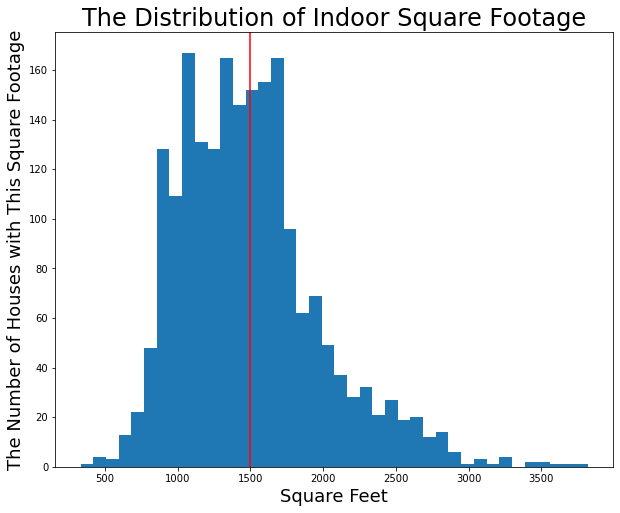

In [529]:
my_histogram(train, 
             "gr_liv_area", 
             "The Distribution of Indoor Square Footage", 
             "Square Feet", 
             "The Number of Houses with This Square Footage")

__Interpretation:__ As expected, the house sizes are more right skewed, as houses have a wider range in sizes, but also have a minimum initial size.

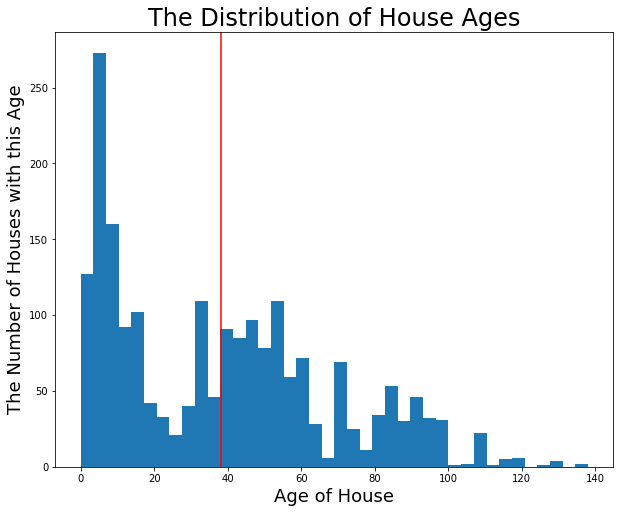

In [530]:
my_histogram(train, 
             "total_age", 
             "The Distribution of House Ages", 
             "Age of House", 
             "The Number of Houses with this Age")

__Interpretation:__ The distribution of house age has a downward slope as older houses are replaced, but it is worth noting how many houses are 40 to 60 years old.

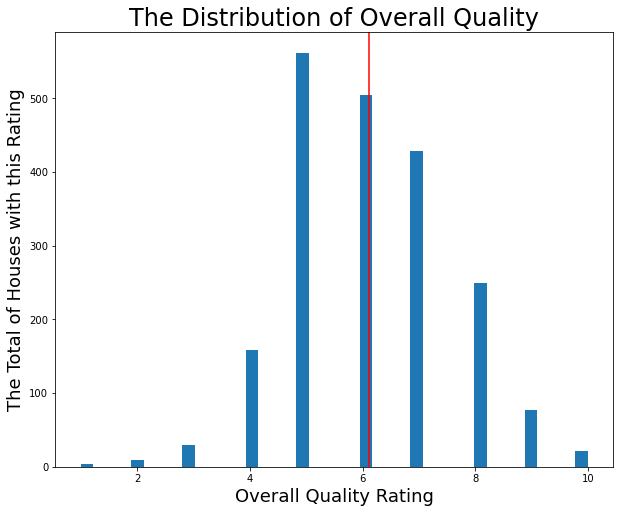

In [531]:
my_histogram(train, 
             "overall_qual", 
             "The Distribution of Overall Quality", 
             "Overall Quality Rating", 
             "The Total of Houses with this Rating")

__Interpretation:__ This distribution has almost a normal distribution, indicating that most houses quality is somewhere in the middle.

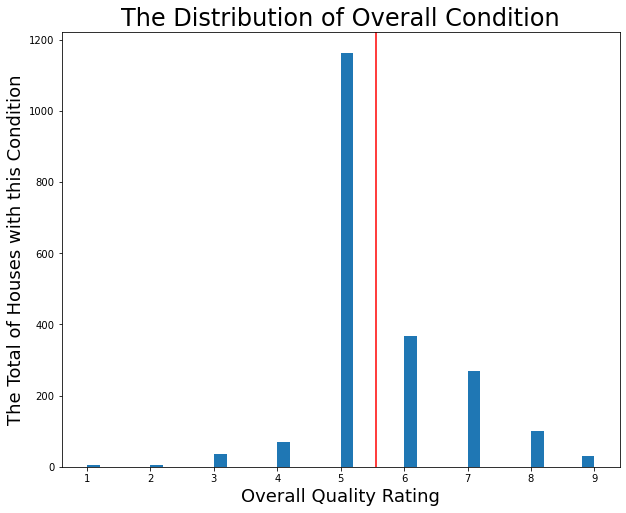

In [532]:
my_histogram(train, 
             "overall_cond", 
             "The Distribution of Overall Condition", 
             "Overall Quality Rating", 
             "The Total of Houses with this Condition")

__Interpretation:__ This distribution illustrates that the overall quality rating may have some issues when considering it. It is left skewed and appears that the majority of houses are just given the average rating.

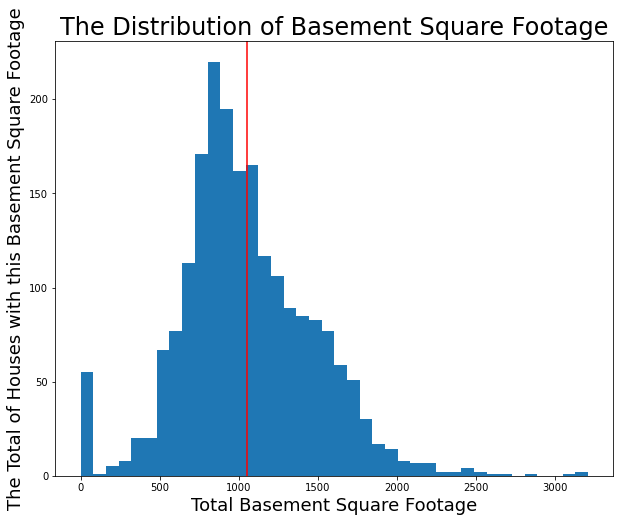

In [533]:
my_histogram(train, 
             "total_bsmt_sf", 
             "The Distribution of Basement Square Footage", 
             "Total Basement Square Footage", 
             "The Total of Houses with this Basement Square Footage")

__Interpretation:__ This distribution illustrates the basement size is normally distributed, if there is a basement in the house.

### BoxPlots

Build a function that will plot a boxplots for us, and all we need to supply are labels and columns.

In [534]:
def my_boxplot(df, x_column, y_column, title, x_label, y_label, size):
    plt.figure(figsize = size)

    sns.boxplot(x = df[x_column], y = df[y_column], palette = ["red","green","yellow", "blue", "orange"],
               order = df.groupby(x_column)[y_column].mean().sort_values().index);
#  I figured out how to order the boxplot by ascending order from 
# https://datavizpyr.com/sort-boxplot-by-mean-with-seaborn-in-python/
  
    plt.title(title, fontsize = 24)
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label, fontsize = 18)
    plt.xticks(rotation = 90, size = 14);

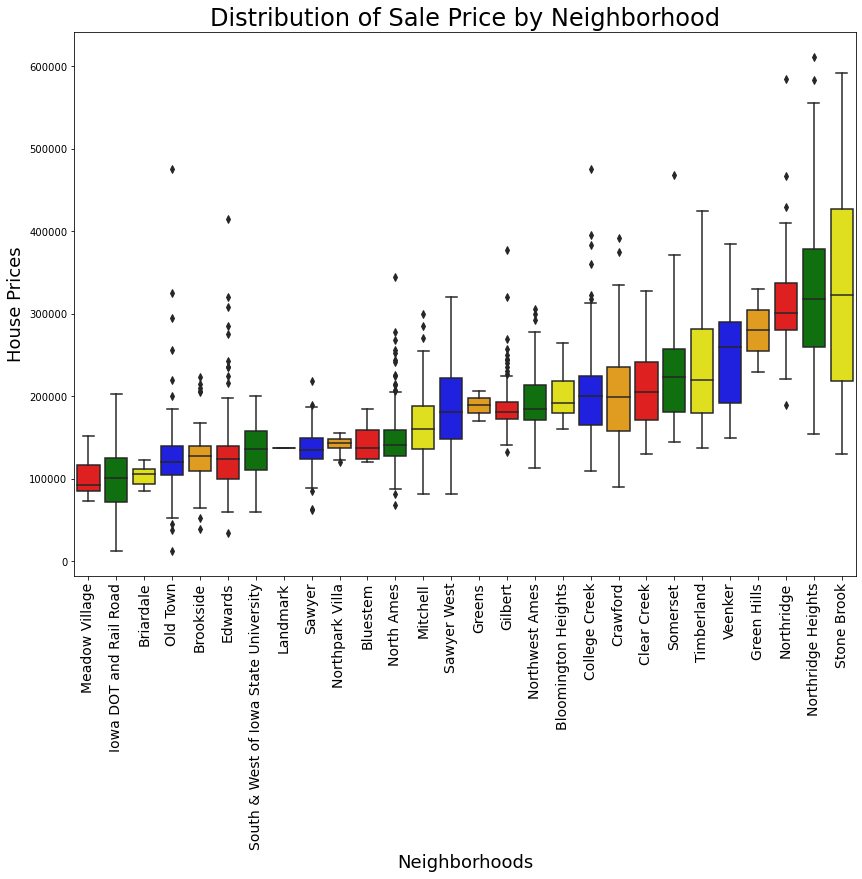

In [535]:
my_boxplot(train,
          "neighborhood",
          "saleprice",
          "Distribution of Sale Price by Neighborhood",
          "Neighborhoods",
          "House Prices",
          (14,10))

__Interpretation:__ This plot shows us the distribution of House Prices across certain Neighborhoods, and how certain neighborhoods have very wide distributions, indicating a wide variety of house types. 

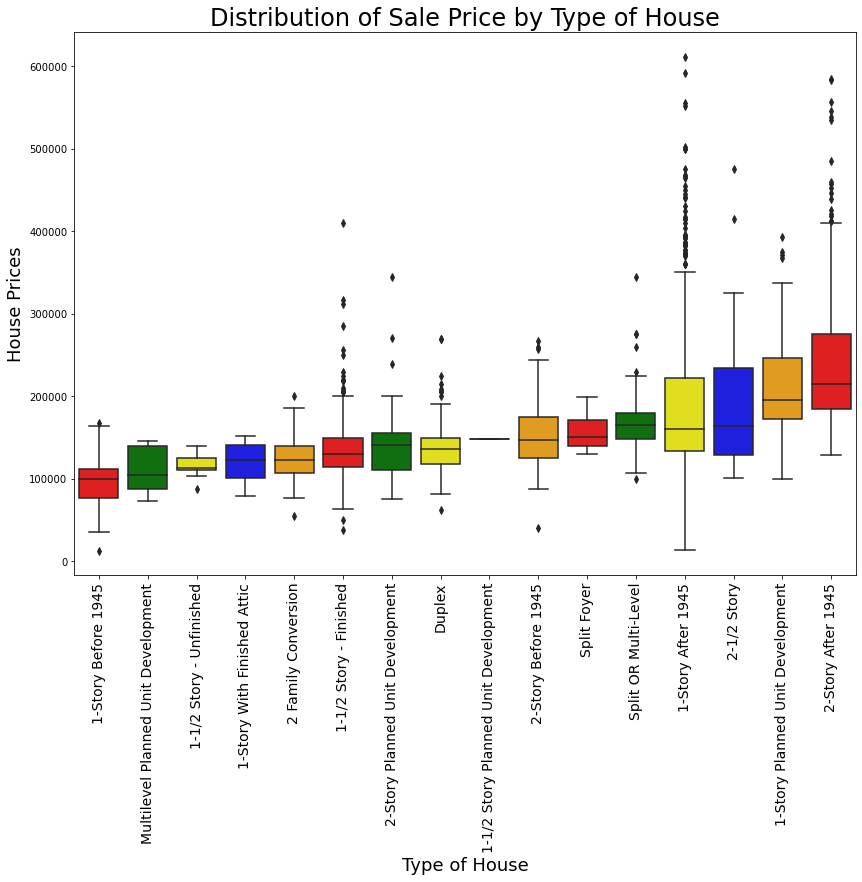

In [536]:
my_boxplot(train,
          "ms_subclass",
          "saleprice",
          "Distribution of Sale Price by Type of House",
          "Type of House",
          "House Prices",
          (14,10))

__Interpretation:__ This plot shows the distribution of house prices for house types.

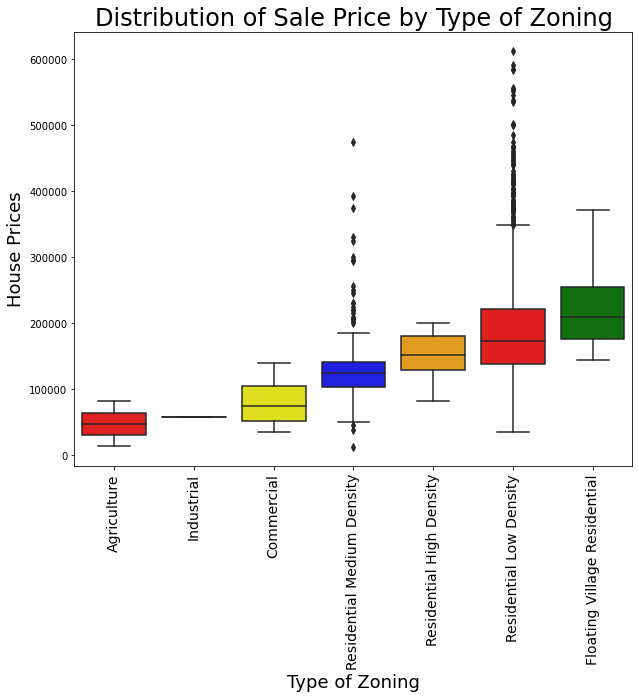

In [537]:
my_boxplot(train,
          "ms_zoning",
          "saleprice",
          "Distribution of Sale Price by Type of Zoning",
          "Type of Zoning",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices for zoning types

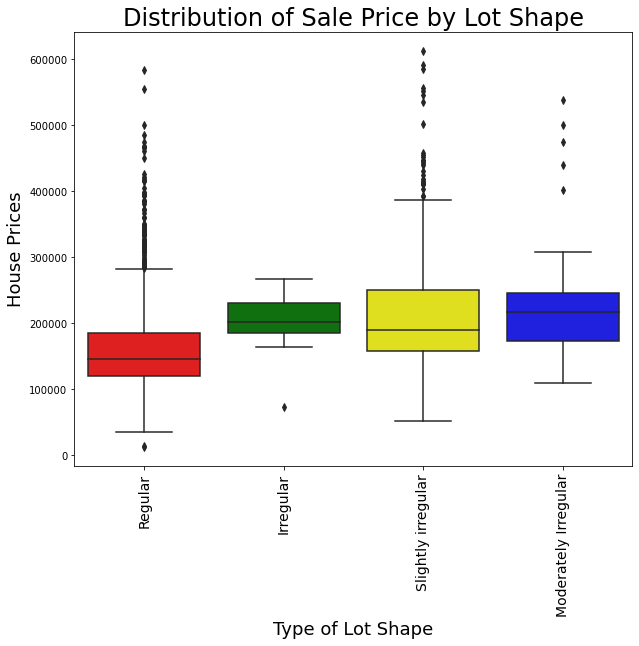

In [538]:
my_boxplot(train,
          "lot_shape",
          "saleprice",
          "Distribution of Sale Price by Lot Shape",
          "Type of Lot Shape",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by lot shape.

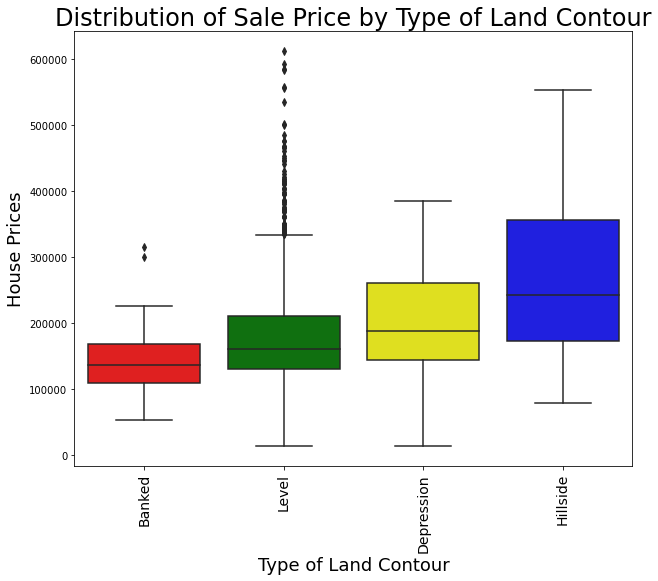

In [539]:
my_boxplot(train,
          "land_contour",
          "saleprice",
          "Distribution of Sale Price by Type of Land Contour",
          "Type of Land Contour",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by property land contour. Take note of the increase in price for Hillside houses.

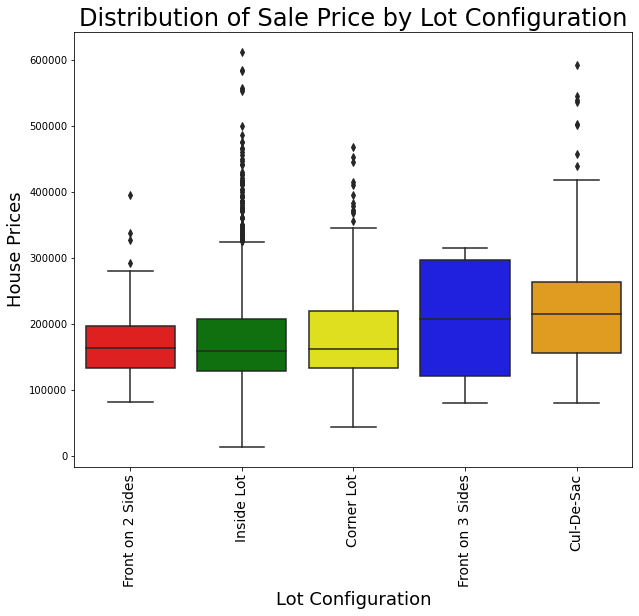

In [540]:
my_boxplot(train,
          "lot_config",
          "saleprice",
          "Distribution of Sale Price by Lot Configuration",
          "Lot Configuration",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by lot configuration.

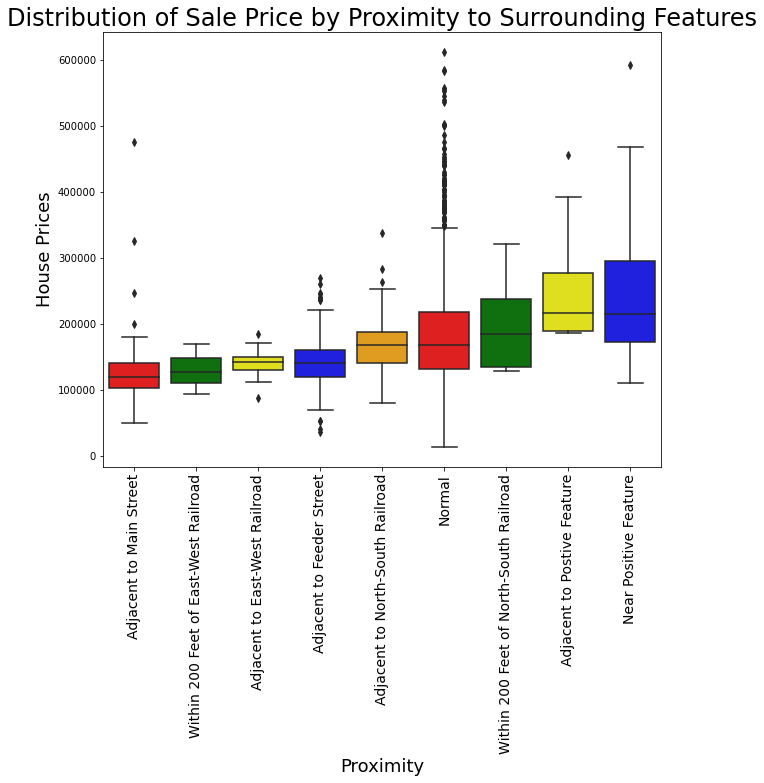

In [541]:
my_boxplot(train,
          "rr_or_road_prox1",
          "saleprice",
          "Distribution of Sale Price by Proximity to Surrounding Features",
          "Proximity",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by what is in close proximity to the house. Notice that the two highest distributions are for houses near positive features, such as parks.

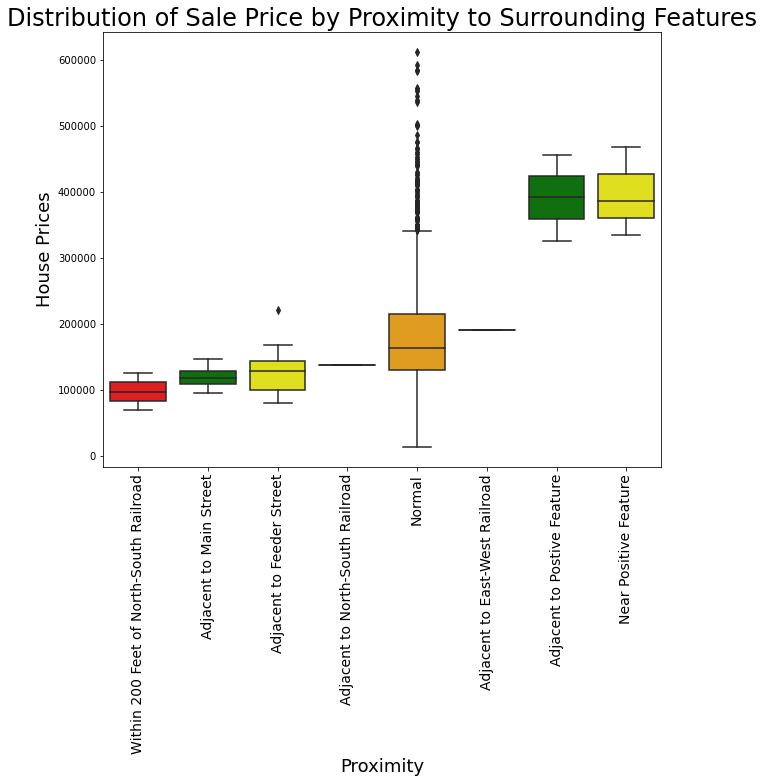

In [542]:
my_boxplot(train,
          "rr_or_road_prox2",
          "saleprice",
          "Distribution of Sale Price by Proximity to Surrounding Features",
          "Proximity",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by what _else_ is in close proximity to the house. Notice that the two highest distributions are for houses near positive features, such as parks.

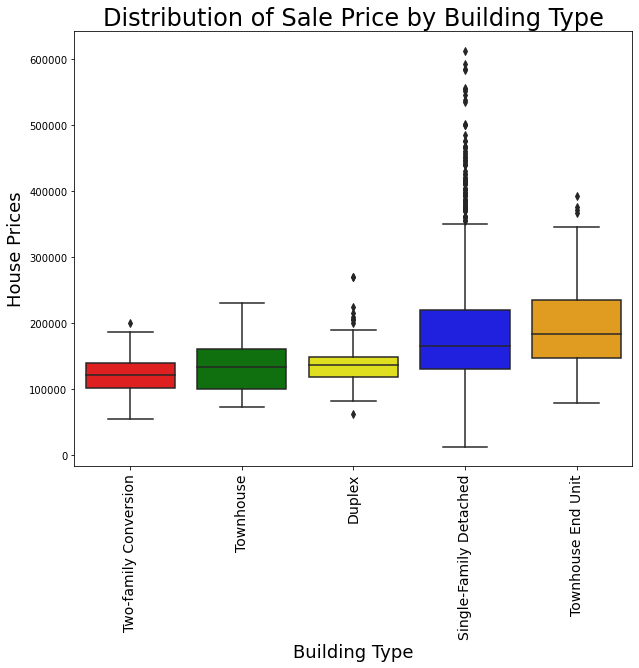

In [543]:
my_boxplot(train,
          "bldg_type",
          "saleprice",
          "Distribution of Sale Price by Building Type",
          "Building Type",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by building type.

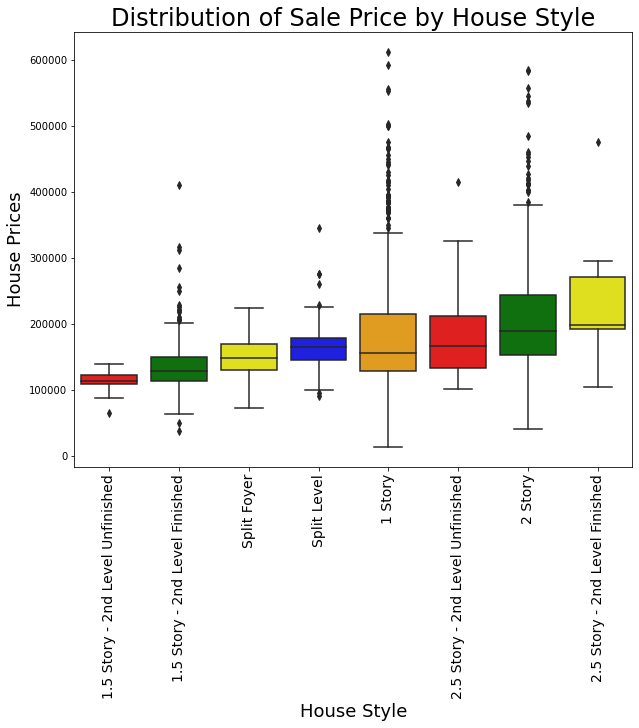

In [544]:
my_boxplot(train,
          "house_style",
          "saleprice",
          "Distribution of Sale Price by House Style",
          "House Style",
          "House Prices",
          (10,8))

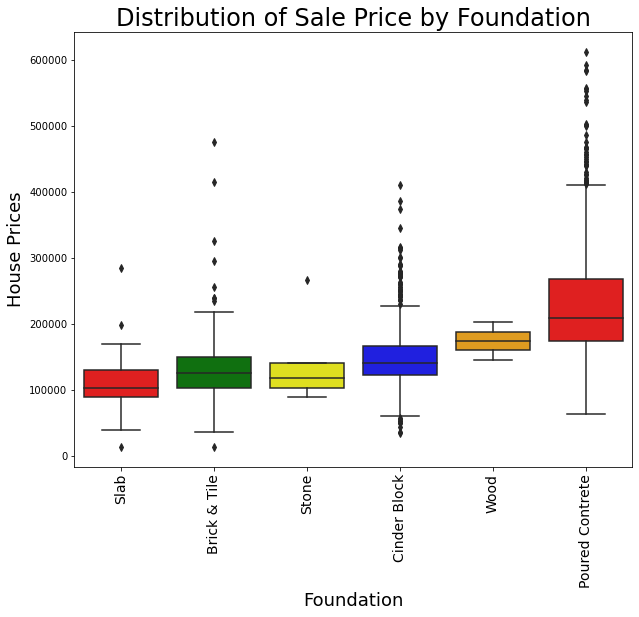

In [545]:
my_boxplot(train,
          "foundation",
          "saleprice",
          "Distribution of Sale Price by Foundation",
          "Foundation",
          "House Prices",
          (10,8))

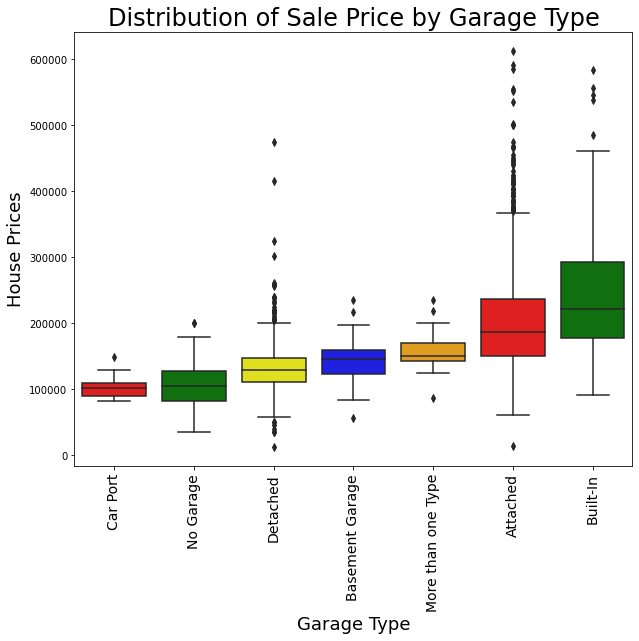

In [546]:
my_boxplot(train,
          "garage_type",
          "saleprice",
          "Distribution of Sale Price by Garage Type",
          "Garage Type",
          "House Prices",
          (10,8))

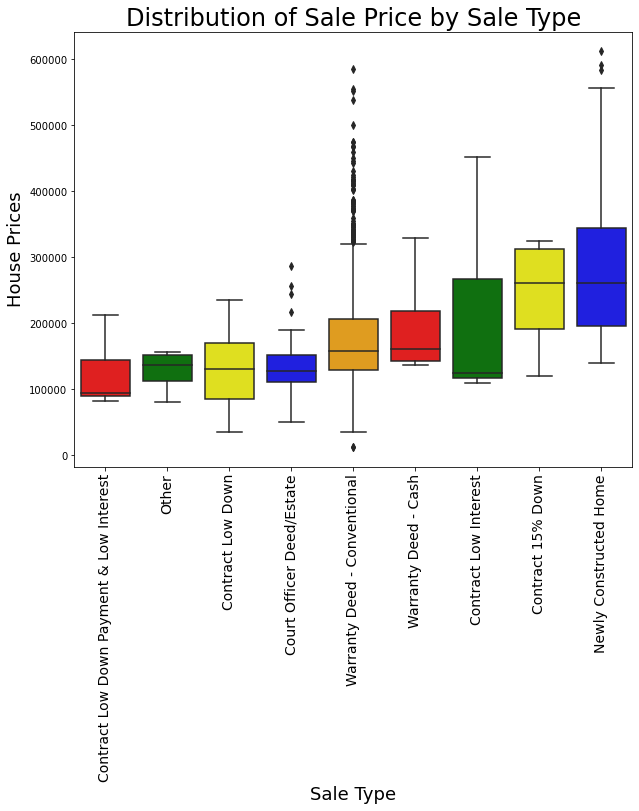

In [547]:
my_boxplot(train,
          "sale_type",
          "saleprice",
          "Distribution of Sale Price by Sale Type",
          "Sale Type",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by how the house was sold.

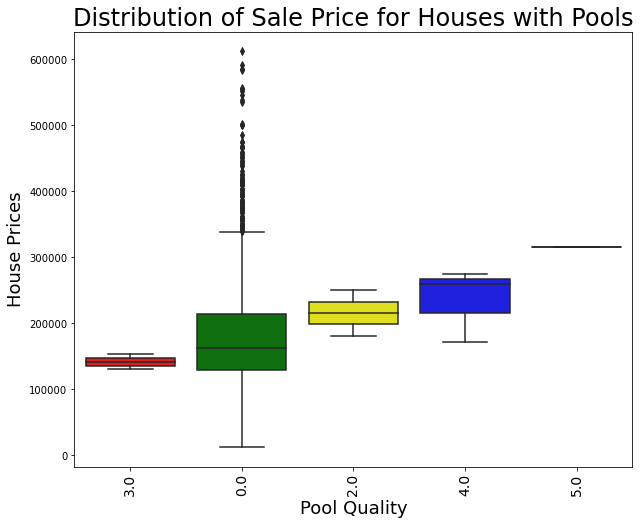

In [548]:
my_boxplot(train,
          "pool_qc",
          "saleprice",
          "Distribution of Sale Price for Houses with Pools",
          "Pool Quality",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by pool quality.

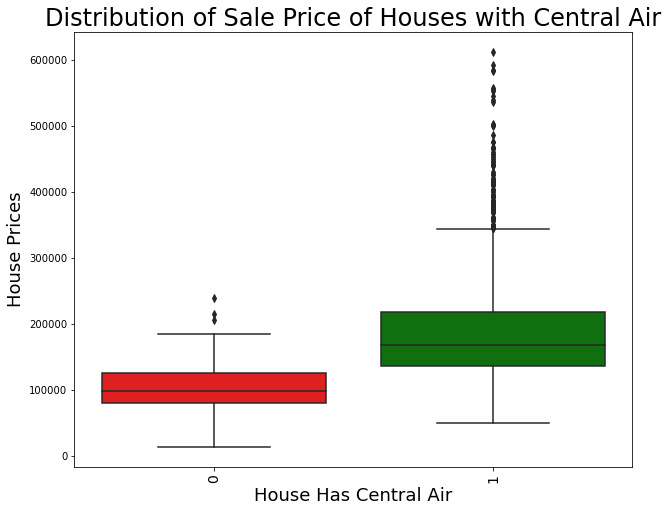

In [549]:
my_boxplot(train,
          "central_air",
          "saleprice",
          "Distribution of Sale Price of Houses with Central Air",
          "House Has Central Air",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by houses with and without central air. Houses with central air are assigned a 1, and sell for nearly 100,000 dollars more on average.

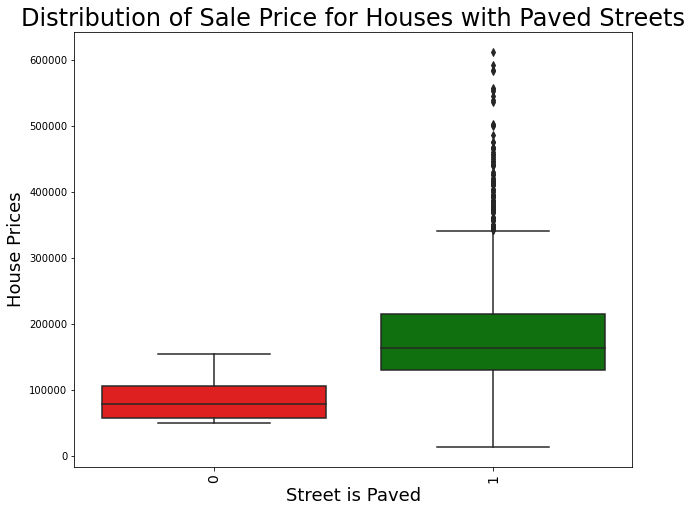

In [550]:
my_boxplot(train,
          "street_paved",
          "saleprice",
          "Distribution of Sale Price for Houses with Paved Streets",
          "Street is Paved",
          "House Prices",
          (10,8))

__Interpretation:__ This plot shows the distribution of house prices by whether or not they have a paved street. Houses with paved streets are assigned a 1, and on average sell for 100,000 dollars more.

### ScatterPlots

Build a function that will plot a scatterplots for us, and all we need to supply are labels and columns.

In [551]:
def my_scatterplot (df, x_column, y_column, title, x_label, y_label, size):
    plt.figure(figsize = size)

    sns.scatterplot(x = df[x_column], y = df[y_column]);

    plt.title(title, fontsize = 24)
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label, fontsize = 18)
    plt.xticks(rotation = 90, size = 14);

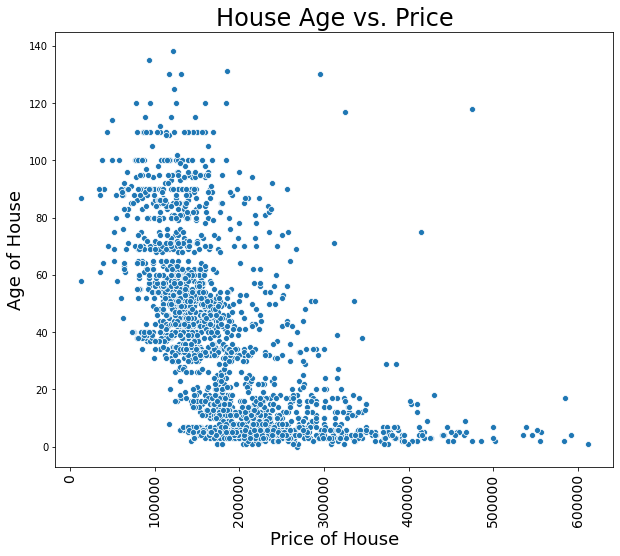

In [552]:
my_scatterplot(train,
              "saleprice",
              "total_age",
              "House Age vs. Price",
              "Price of House",
              "Age of House",
              (10,8))

__Interpretation:__ This plot shows the spread of house prices compared to their age. Notice how nearly all the houses selling for over 400,000 dollars are 20 years or younger.

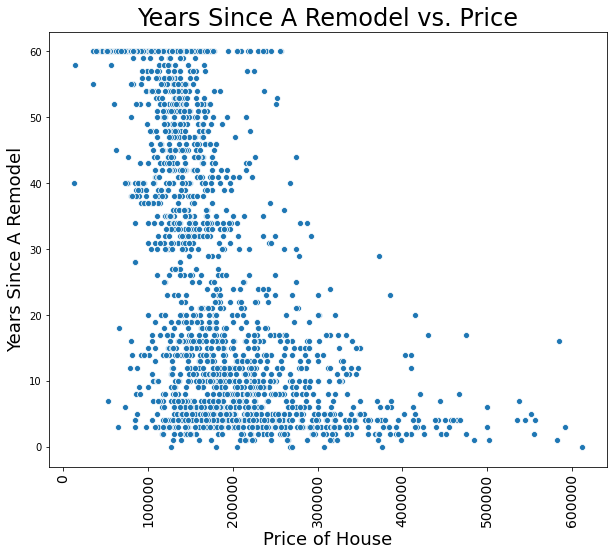

In [553]:
my_scatterplot(train,
              "saleprice",
              "remodel_age",
              "Years Since A Remodel vs. Price",
              "Price of House",
              "Years Since A Remodel",
              (10,8))

__Interpretation:__ This Scatter Plot shows the price of houses compared to how many years it has been since the house was remodeled. This plot also indicates that the less time that has passed since a remodel, the more the house is worth.

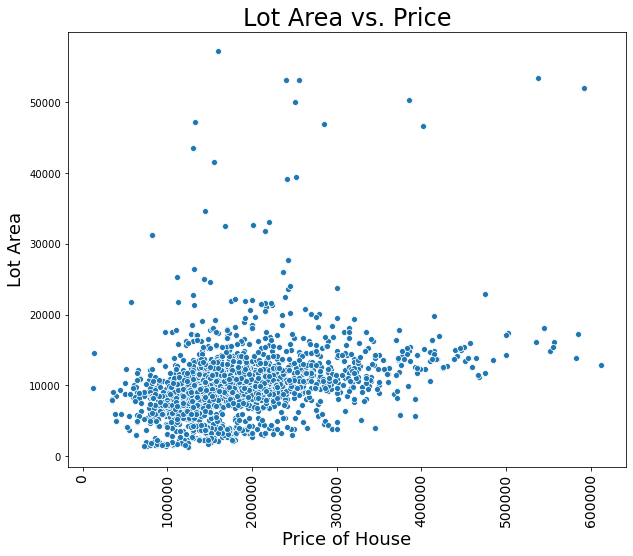

In [554]:
my_scatterplot(train,
              "saleprice",
              "lot_area",
              "Lot Area vs. Price",
              "Price of House",
              "Lot Area",
              (10,8))

__Interpretation:__ This plot shows the prices of houses compared to the lot size. This chart showed us some outliers that needed removal before we make our models.

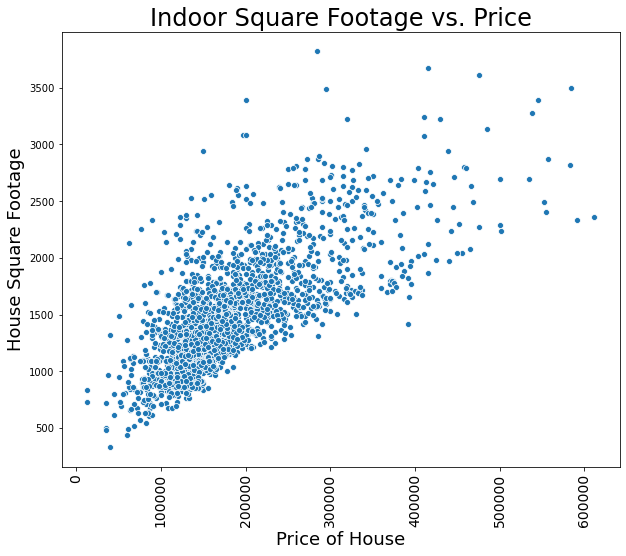

In [555]:
my_scatterplot(train,
              "saleprice",
              "gr_liv_area",
              "Indoor Square Footage vs. Price",
              "Price of House",
              "House Square Footage",
              (10,8))

__Interpretation:__ This scatterplot shows us a clear upward correlation between price of house and square footage of the house interior.

### Heatmaps

Determine our columns with the highest and lowest correlation to our target sales price

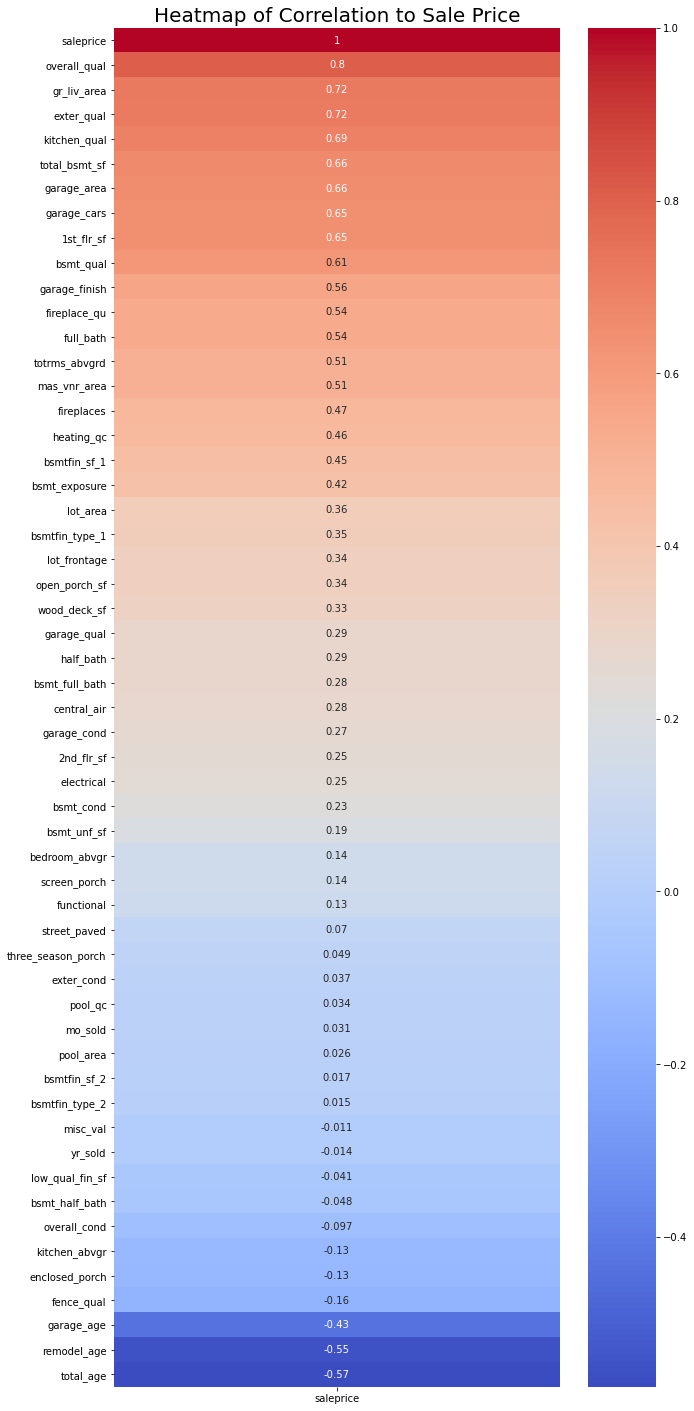

In [556]:
# Create a heatmap that orders our highest to lowest correlations
plt.figure(figsize = (10,25))
sns.heatmap(train.corr()[["saleprice"]].sort_values(by = "saleprice", ascending = False),
           annot = True,
           cmap = "coolwarm")
plt.title("Heatmap of Correlation to Sale Price", fontsize = 20);

This heatmap shows us that there are quite a few highly correlated positive columns while not so many negatively correlated columns.

Build another heatmap that only involves our most highly correlated features

In [557]:
# this snippet of code was shared with me by Quinton Lopez
# Lets collect all of our positively correlated variables that have a correlation higher than 0.6
high_corr = list(train.corr()["saleprice"].sort_values(ascending = False).index[:10])
# And add on all of our negatively correlated variables lower than -0.5
high_corr += list(train.corr()["saleprice"].sort_values().index[:2])

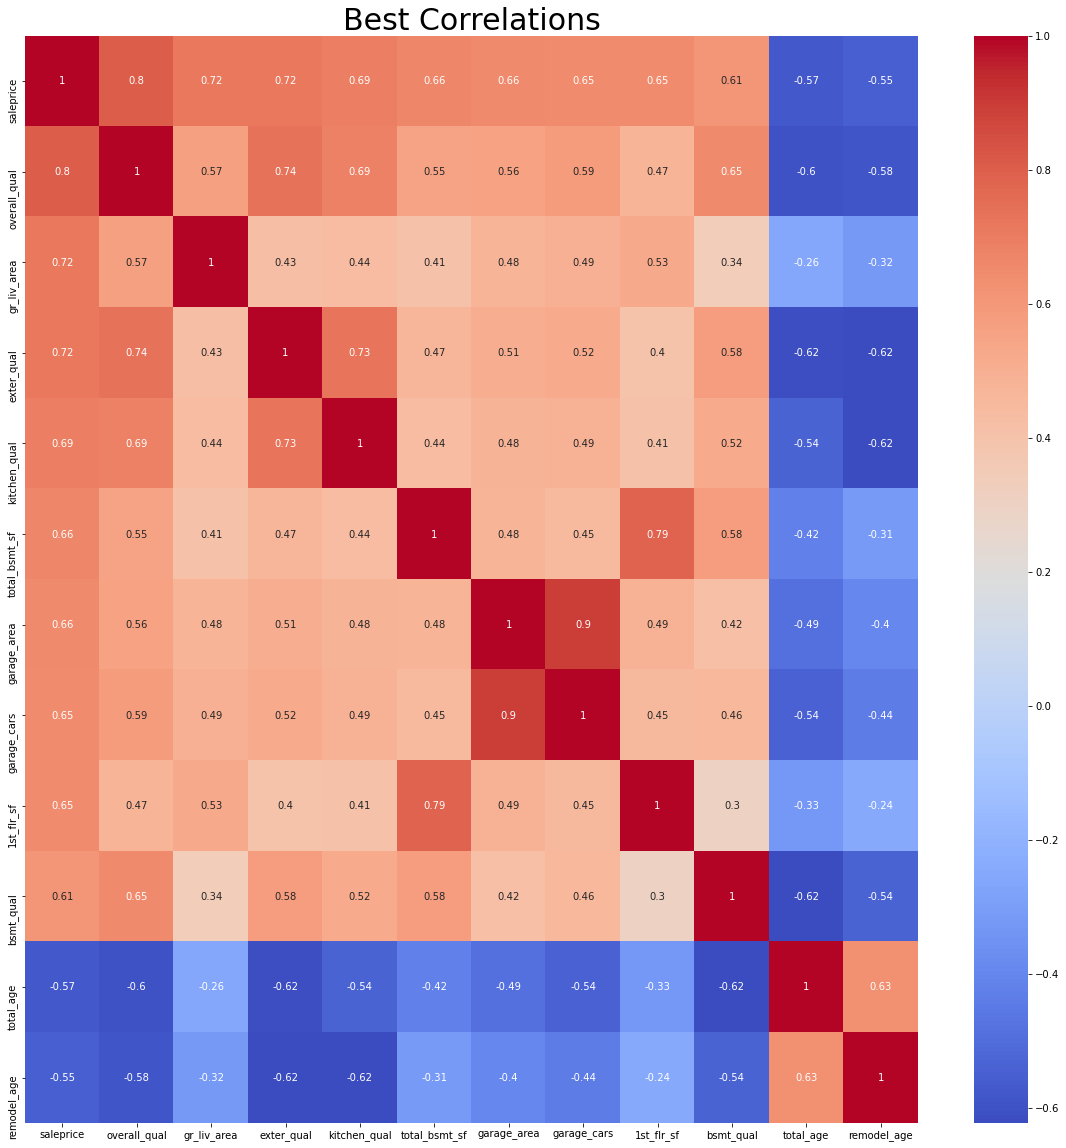

In [558]:
high_corr_df = train[high_corr]
plt.figure(figsize=(20, 20)) # size of the graph
plt.title('Best Correlations', fontsize = 30)
sns.heatmap(high_corr_df.corr(),
            annot=True,
            cmap='coolwarm');

This heatmap illustrates to us some important correlations to the sale price such as:
- Overall Quality
- Garage size
- Kitchen
- House size
- Basement size
- Age of the house

Given everything that we've gone through, I'm confident that we'll be able to build a model that will determine what aspects are the most important for remodeling a house.

### Feature Engineering

We'll begin by making an interaction between house size and lot size

In [559]:
train["house_and_lot"] = train["lot_area"] * train["gr_liv_area"]

In [560]:
test["house_and_lot"] = test["lot_area"] * test["gr_liv_area"]

Next, we'll create some dummy columns for our model. So, let's collect all of our categorical columns

In [561]:
categorical = []
for column in list(train.columns):
    if train[column].dtype == object:
        categorical.append(column)

categorical

['id',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'rr_or_road_prox1',
 'rr_or_road_prox2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'heating',
 'garage_type',
 'paved_drive',
 'misc_feature',
 'sale_type']

We see that there are some values that we don't want to dummify, so we need to drop them.

In [562]:
categorical.remove("id")
categorical.remove("pid")

Now we're ready to dummify!

In [563]:
train = pd.get_dummies(train, columns = categorical, drop_first= True)
train.shape

(2045, 216)

In [564]:
test = pd.get_dummies(test, columns = categorical, drop_first= True)
test.shape

(878, 205)

As we can see, there are certain columns that are not in both data sets. We need to remove the columns from the train set before we run our model.

In [565]:
extra_columns = []
for column in train.columns:
    if column not in test.columns:
        extra_columns.append(column)
extra_columns

['saleprice',
 'ms_subclass_1-1/2 Story Planned Unit Development',
 'ms_zoning_Commercial',
 'utilities_No Water',
 'neighborhood_Green Hills',
 'neighborhood_Landmark',
 'rr_or_road_prox2_Adjacent to Feeder Street',
 'rr_or_road_prox2_Adjacent to Main Street',
 'rr_or_road_prox2_Adjacent to North-South Railroad',
 'rr_or_road_prox2_Near Positive Feature',
 'rr_or_road_prox2_Within 200 Feet of North-South Railroad',
 'roof_matl_Membrane',
 'exterior_1st_Cinder Block',
 'exterior_1st_Imitation Stucco',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'heating_Non-Gas Hot Water or steam heat',
 'heating_Wall Furnace',
 'misc_feature_Tennis Court']

In [566]:
# We want to keep our saleprice, so we need to remove that one from the list before dropping our columns
extra_columns.remove("saleprice")

train.drop(columns = extra_columns, inplace = True)

In [567]:
train.shape

(2045, 198)

## Model Preparation

__Train/Test Split__

In [568]:
# select our features, which we'll start with everything, except id and pid numbers and our target
X = train.drop(columns = ["saleprice", "id", "pid"])
# Select our target
y = train["saleprice"]

In [569]:
X.shape

(2045, 195)

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state  = 613, train_size = 0.75)

__Scale our Data__
Certain models require the data to be scaled, so we'll take care of that now.

In [571]:
ss = StandardScaler()
# fit and transform X_train
X_train_sc = ss.fit_transform(X_train)
# transform X_test
X_test_sc = ss.transform(X_test)

## Modeling

### Baseline Model
Our first model will be the baseline model that only makes predictions by considering the mean of the target value, the sale price. 

In [572]:
# use sklearn's dummy regressor
dummy = DummyRegressor(strategy = "mean")
# fit our data
dummy.fit(X_train, y_train)

DummyRegressor()

In [573]:
# Since R2 score isn't helpful here, we'll use rmse as a comparison 
dummy_preds = dummy.predict(X_train)

dummy_mse = metrics.mean_squared_error(y_train, dummy_preds)

dummy_rmse = np.sqrt(dummy_mse)
dummy_rmse

77970.36643278104

### Linear Regression Model 1

In [574]:
# Utilize sklearns LinearRegression
lr = LinearRegression()
# Fit our model
lr.fit(X_train, y_train)

LinearRegression()

Build a function that will return all of our relevant metrics including $R^2$ and Cross validation scores in the form of a dataframe.

In [575]:
def scores_df(model, training_df, testing_df, model_name, alpha = None):
    # Start with a list of our different scores
    list1 = ["Training R2", "Testing R2", "Cross Validation Mean", "Best Alpha"]
    # create a list with our actual scores
    list2 = [round(model.score(training_df, y_train), 3), 
             round(model.score(testing_df, y_test), 3),
             round(cross_val_score(model, training_df, y_train, cv = 5).mean(), 3),
             alpha]
    # Loop through all 5 cross validations and return the scores on each one.
    for position, i in enumerate(cross_val_score(model, training_df, y_train, cv = 5)):
        # add our new row name
        list1.append(f"Cross Validation R2, Fold {position + 1}") 
        # add the cross val score
        list2.append(round(i, 3))
        
    # This dataframe initiation was copied from https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
    df = pd.DataFrame(list(zip(list1, list2)), 
               columns =[model_name, 'Score'])
    return df

In [576]:
scores_df(lr, X_train, X_test, "Linear Regression 1")

,Linear Regression 1,Score
0,Training R2,0.93
1,Testing R2,0.90
2,Cross Validation Mean,0.90
3,Best Alpha,nan
4,"Cross Validation R2, Fold 1",0.90
5,"Cross Validation R2, Fold 2",0.91
6,"Cross Validation R2, Fold 3",0.90
7,"Cross Validation R2, Fold 4",0.88
8,"Cross Validation R2, Fold 5",0.89


Take a look at some of our coefficients.

In [577]:
pd.DataFrame(zip(X.columns, lr.coef_),columns = ["Variable", "Model 1 Coefficient"]).head()

,Variable,Model 1 Coefficient
0,lot_frontage,115.82
1,lot_area,0.47
2,street_paved,10311.83
3,overall_qual,7789.28
4,overall_cond,5197.42


### Ridge Model 1

In [578]:
# set up a space for our ridge to determine our best alpha
ridge_alphas = np.logspace(0, 5, 101)

ridge = RidgeCV(
    alphas = ridge_alphas,
    scoring = "r2",
    cv = 5)

ridge.fit(X_train_sc, y_train);

In [579]:
scores_df(ridge, X_train_sc, X_test_sc, "Ridge Model 1", alpha = round(ridge.alpha_, 3))

,Ridge Model 1,Score
0,Training R2,0.93
1,Testing R2,0.90
2,Cross Validation Mean,0.91
3,Best Alpha,141.25
4,"Cross Validation R2, Fold 1",0.91
5,"Cross Validation R2, Fold 2",0.91
6,"Cross Validation R2, Fold 3",0.91
7,"Cross Validation R2, Fold 4",0.90
8,"Cross Validation R2, Fold 5",0.90


Take a look at some of our coefficients.

In [580]:
pd.DataFrame(zip(X.columns, ridge.coef_),columns = ["Variable", "Ridge Coefficient"]).head()

,Variable,Ridge Coefficient
0,lot_frontage,2613.79
1,lot_area,752.13
2,street_paved,324.16
3,overall_qual,9772.94
4,overall_cond,4667.51


### LASSO Model 1

In [581]:
# Set up a list of Lasso alphas to check.
lasso_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of Lasso alphas.
lasso = LassoCV(
    alphas = lasso_alphas, 
    cv = 5, 
    max_iter = 10000)

# Fit model using best ridge alpha!
lasso.fit(X_train_sc, y_train);

In [582]:
scores_df(lasso, X_train_sc, X_test_sc, "LASSO Model 1", alpha = round(lasso.alpha_, 3))

,LASSO Model 1,Score
0,Training R2,0.93
1,Testing R2,0.91
2,Cross Validation Mean,0.91
3,Best Alpha,376.49
4,"Cross Validation R2, Fold 1",0.91
5,"Cross Validation R2, Fold 2",0.91
6,"Cross Validation R2, Fold 3",0.91
7,"Cross Validation R2, Fold 4",0.89
8,"Cross Validation R2, Fold 5",0.90


Take a look at some of our coefficients. This is important, as LASSO models will shrink the coefficients that are determined to be too small to be relevant showing us which ones are unnecessary.

In [583]:
lasso_df = pd.DataFrame(zip(X.columns, lasso.coef_),columns = ["Variable", "Lasso Coefficient"])
lasso_df.head()

,Variable,Lasso Coefficient
0,lot_frontage,1973.60
1,lot_area,0.00
2,street_paved,0.00
3,overall_qual,12208.43
4,overall_cond,4575.82


How many features are unnecessary?

In [584]:
lasso_df.loc[(lasso_df["Lasso Coefficient"] == 0.00) & (lasso_df["Lasso Coefficient"] == -0.00), "Variable"].shape

(80,)

In [585]:
# Create a list of all our unnecessary features.
drop_cols = list(lasso_df.loc[(lasso_df["Lasso Coefficient"] == 0.00) & (lasso_df["Lasso Coefficient"] == -0.00), "Variable"])

### Linear Regression Model 2

Now, we're going to create a new linear regression model that removes all the columns that our LASSO model has "shrunk".

In [586]:
# Add the original columns we don't want in our features
drop_cols += ["saleprice", "id", "pid"]
# Use a new name for our dataframe as we might want to differentiate it later.
X2 = train.drop(columns = drop_cols)
X2.shape

(2045, 115)

In [587]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state  = 613, train_size = 0.75)

In [588]:
ss = StandardScaler()
# fit and transform X_train
X2_train_sc = ss.fit_transform(X2_train)
# transform X_test
X2_test_sc = ss.transform(X2_test)

In [589]:
lr2 = LinearRegression()

lr2.fit(X2_train, y_train)

LinearRegression()

In [590]:
scores_df(lr2, X2_train, X2_test, "Linear Regression 2")

,Linear Regression 2,Score
0,Training R2,0.93
1,Testing R2,0.90
2,Cross Validation Mean,0.91
3,Best Alpha,nan
4,"Cross Validation R2, Fold 1",0.91
5,"Cross Validation R2, Fold 2",0.92
6,"Cross Validation R2, Fold 3",0.91
7,"Cross Validation R2, Fold 4",0.90
8,"Cross Validation R2, Fold 5",0.91


### Ridge Model 2

In [591]:
ridge_alphas = np.logspace(0, 5, 101)

ridge2 = RidgeCV(
    alphas = ridge_alphas,
    scoring = "r2",
    cv = 5)

ridge2.fit(X2_train_sc, y_train);

In [592]:
scores_df(ridge2, X2_train_sc, X2_test_sc, "Ridge Model 2", alpha = round(ridge2.alpha_, 3))

,Ridge Model 2,Score
0,Training R2,0.93
1,Testing R2,0.90
2,Cross Validation Mean,0.91
3,Best Alpha,50.12
4,"Cross Validation R2, Fold 1",0.92
5,"Cross Validation R2, Fold 2",0.92
6,"Cross Validation R2, Fold 3",0.92
7,"Cross Validation R2, Fold 4",0.90
8,"Cross Validation R2, Fold 5",0.91


### LASSO Model 2

In [593]:
# Set up a list of Lasso alphas to check.
lasso_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of Lasso alphas.
lasso2 = LassoCV(
    alphas = lasso_alphas, 
    cv = 5, 
    max_iter = 10000)

# Fit model using best ridge alpha!
lasso2.fit(X2_train_sc, y_train);

In [594]:
scores_df(lasso2, X2_train_sc, X2_test_sc, "LASSO Model 2", alpha = round(lasso2.alpha_, 3))

,LASSO Model 2,Score
0,Training R2,0.93
1,Testing R2,0.91
2,Cross Validation Mean,0.91
3,Best Alpha,83.02
4,"Cross Validation R2, Fold 1",0.92
5,"Cross Validation R2, Fold 2",0.92
6,"Cross Validation R2, Fold 3",0.91
7,"Cross Validation R2, Fold 4",0.90
8,"Cross Validation R2, Fold 5",0.91


In [595]:
lasso2_df = pd.DataFrame(zip(X2.columns, lasso2.coef_),columns = ["Variable", "Lasso Coefficient"])
lasso2_df.head()

,Variable,Lasso Coefficient
0,lot_frontage,2273.89
1,overall_qual,11777.73
2,overall_cond,5529.21
3,total_age,-8126.35
4,remodel_age,-649.23


In [596]:
list(lasso2_df.loc[(lasso2_df["Lasso Coefficient"] == 0.00) & (lasso2_df["Lasso Coefficient"] == -0.00), "Variable"])

['fireplace_qu', 'sale_type_Contract Low Down']

At this point, removing these 2 features as per the suggestion of the LASSO Model, does not improve our model significantly enough.

### Linear Regression Model 3
This linear regression model is a model that is based entirely on just a custom build that I made, utilizing only our high correlation values.

In [597]:
high_corr.remove("saleprice")

X3 = train[high_corr]

X3_train, X3_test, y_train, y_test = train_test_split(X3, y, random_state  = 613, train_size = 0.75)

In [598]:
lr3 = LinearRegression()

lr3.fit(X3_train, y_train)

LinearRegression()

In [599]:
scores_df(lr3, X3_train, X3_test, "Linear Regression 3")

,Linear Regression 3,Score
0,Training R2,0.85
1,Testing R2,0.83
2,Cross Validation Mean,0.84
3,Best Alpha,nan
4,"Cross Validation R2, Fold 1",0.86
5,"Cross Validation R2, Fold 2",0.86
6,"Cross Validation R2, Fold 3",0.84
7,"Cross Validation R2, Fold 4",0.83
8,"Cross Validation R2, Fold 5",0.83


### Linear Regression Model 4
This final model is going to use PolyNomial features and will generally be uninterpretable, but lets see if we can build a better model with it anyway.

In [600]:
# reuse our original X dataset.
poly = PolynomialFeatures(include_bias= False)

X_poly = poly.fit_transform(X)

In [601]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, random_state  = 613, train_size = 0.75)

In [602]:
lr4 = LinearRegression()

lr4.fit(X_train_poly, y_train)

LinearRegression()

In [603]:
scores_df(lr4, X_train_poly, X_test_poly, "Linear Regression 4")

,Linear Regression 4,Score
0,Training R2,1.00
1,Testing R2,-74.34
2,Cross Validation Mean,-56.52
3,Best Alpha,nan
4,"Cross Validation R2, Fold 1",-7.32
5,"Cross Validation R2, Fold 2",-3.15
6,"Cross Validation R2, Fold 3",-13.79
7,"Cross Validation R2, Fold 4",-118.01
8,"Cross Validation R2, Fold 5",-140.32


## Model Selection

We can take a look at the Table below to see what is the best option for our Model Selection.

Model Name | Training Score | Testing Score
-|-|-
Baseline | 0.0% | 0.0%
Linear Regression Model 1 | 93.1% | 90.7%
Ridge Model 1 | 92.5% | 91.1%
LASSO Model 1 | 92.3% | 91.2%
Linear Regression Model 2 | 92.7% | 91.1%
Ridge Model 2 | 92.6% | 91.1%
LASSO Model 2 | 92.7% | 91.2%
Linear Regression Model 3 | 84.4% | 84.6%
Linear Regression Model 4 | 99.9% | -11761.5%

We can see that our 4th Linear Regression is incredibly overfit, however, it would appear that our best model is our second Linear Model, with lower variance, and a R2 Score of 91.1% on the testing data.

## Model Evaluation

### Regression Metrics

Build a function to determine our residuals and predictions.

In [604]:
def preds_and_resids(model, df, target):
    # set a variable for our predictions
    y_pred = model.predict(df)
    # set a variable representing our residuals
    resids = target - y_pred
    return [y_pred, resids]

In [605]:
# Set up 2 variables containing our training predictions and residuals
train_pred, train_resids = preds_and_resids(lr2, X2_train, y_train)

In [606]:
# Set up 2 variables containing our test predictions and residuals
test_pred, test_resids = preds_and_resids(lr2, X2_test, y_test)

Build a function that will pass in our predictions and residuals to return a dataframe of our regression metrics.

In [607]:
def regression_metrics(model, df, target):
    # set 2 variables with our predictions and residuals
    y_pred, resids = preds_and_resids(model,df, target)
    # set our sum of squared error
    rss = (resids**2).sum()
    # set up our mean absolute error
    mae = np.abs(resids).mean()
    # set up our mean squared error
    mse = rss/len(resids)
    # set up our root mean squared error
    rmse = np.sqrt(mse)
    # set up our coefficient of determination
    r_2 = model.score(df, target)
    list1 = ["Sum Squared Error","Mean Absolute Error", 
             "Mean Squared Error", "Root Mean Squared Error", "Coefficient of Determination"]
    list2 = [rss, mae, mse, rmse, r_2]
    # create a dataframe out of our 2 lists
    data = pd.DataFrame(list(zip(list1, list2)), 
               columns =["Metric", "Score"])
    
    return data

In [608]:
regression_metrics(lr2, X2_train, y_train) # Get our regression metrics for our training model

,Metric,Score
0,Sum Squared Error,642853696620.33
1,Mean Absolute Error,14559.30
2,Mean Squared Error,419343572.49
3,Root Mean Squared Error,20477.88
4,Coefficient of Determination,0.93


In [609]:
regression_metrics(lr2, X2_test, y_test) # Get our regression metrics for our test model

,Metric,Score
0,Sum Squared Error,339803586076.19
1,Mean Absolute Error,17307.95
2,Mean Squared Error,663678879.06
3,Root Mean Squared Error,25761.97
4,Coefficient of Determination,0.90


Comparing to our Dummy model, which was only predicting the mean of sale prices, we see our RMSE has dropped by over 50,000 Dollars.

### LINE Assumptions
Does this model do what we want it to?

1. Linearity - is the relationship between $\hat{y}$ (our predict values) and $y$ (actual values) linear?

In [610]:
# This function was borrowed from Mahdi's linear regression lecture with permission
# Automating graphing process
def plot_predictions(model_name, y_train_pred, y_test_pred, y_train_actual, y_test_actual, figsize):
    plt.figure(figsize = (figsize))
    # create a scatterplot of our Training data
    sns.scatterplot(y_train_pred, y_train_actual, label = "Training Data", color = "blue", alpha = .75)
    # Overlap it with a scatterplot of our testing data
    sns.scatterplot(y_test_pred, y_test_actual, label = "Testing Data", color = "lightgreen", alpha = .75)
    
    plt.title(model_name, fontsize = 25)
    plt.xlabel("Predicted Sale Price", fontsize = 20)
    plt.ylabel("Actual Sale Price", fontsize = 20)
    plt.legend(loc = "upper left", fontsize = 15)
    # concatenate our values
    all_vals = np.concatenate([y_train_pred, y_test_pred, y_train_actual, y_test_actual])
    # determine our max value
    the_max_val = np.max(all_vals)
    # determine our minimum value
    the_min_val = np.min(all_vals)
    # plot a line through these 2 points
    plt.plot([the_min_val, the_max_val],[the_min_val, the_max_val], c='red')
    plt.tight_layout()

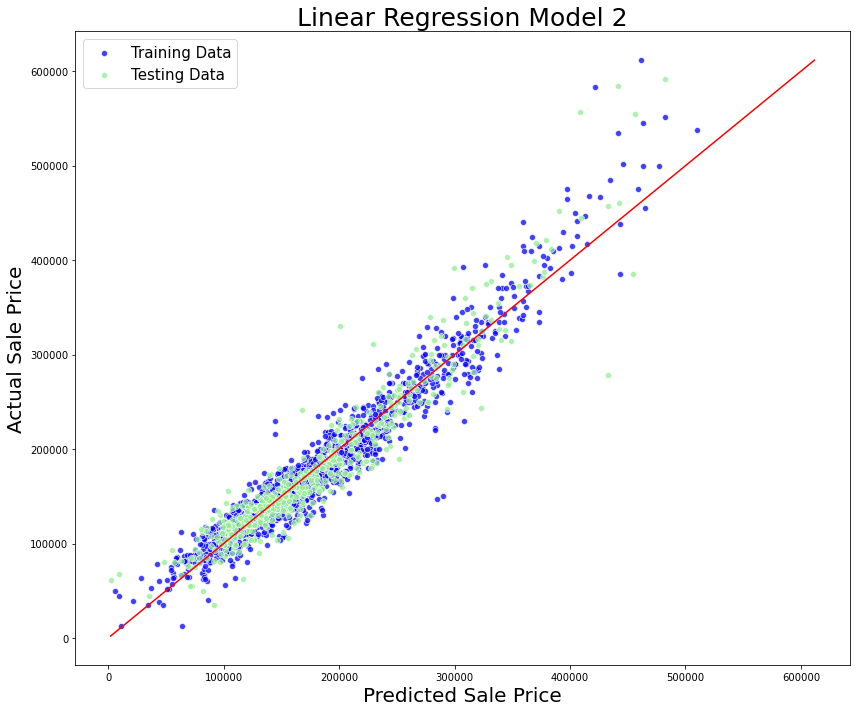

In [611]:
plot_predictions("Linear Regression Model 2",
                train_pred,
                test_pred,
                y_train,
                y_test,
                (12,10))

__Interpretation:__ This model appears to have predicted our sales prices relatively well, illustrating a good degree of linearity. However, it should be noted that as our prices increase, the model does not do as well.

2. Normal - Are the residuals normally distributed?

In [612]:
def resids_hist(training_residuals, testing_residuals):
    plt.figure(figsize = (12,8))
    plt.hist(training_residuals,
            bins = 20, color = "blue", alpha = 0.7, label = "Training Data")
    plt.hist(testing_residuals, bins = 20, color = "lightgreen", alpha = 0.7, label = "Testing Data")
    plt.title("Distribution of Residuals", fontsize = 25)
    plt.xlabel("Residuals", fontsize = 20)
    plt.legend(loc = "upper left", fontsize = 15)
    plt.axvline(training_residuals.mean(), color = "red");

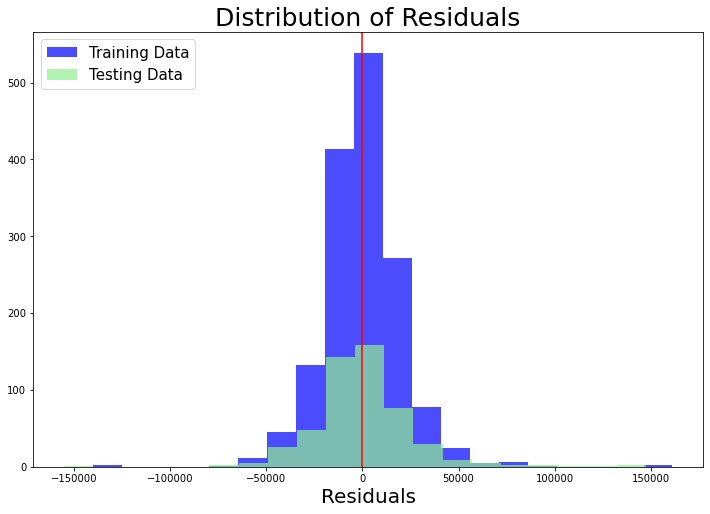

In [613]:
resids_hist(train_resids, test_resids)

__Interpretation:__ Our residuals appear to be following a normal distribution.

3. Equality of Variance.
Is the variance of the residuals Homoscedastic? Is there variance throughout?

In [614]:
def resids_preds_scatter(training_predictions, training_residuals, testing_predictions, testing_residuals, homosced):
    plt.figure(figsize=(12,10))
    plt.scatter(training_predictions, training_residuals, color = "blue", label = "Training Data")
    plt.scatter(testing_predictions, testing_residuals, color = "lightgreen", label = "Testing Data")

    plt.axhline(0, color = "orange")
    plt.axhline(-homosced, color = "red", linestyle = "--")
    plt.axhline(homosced, color = "red", linestyle = "--")

    plt.title("Residuals vs. Predictions", fontsize = 25)
    plt.xlabel("Predicted Prices", fontsize = 20)
    plt.ylabel("Residuals", fontsize = 20)
    plt.legend(loc = "upper left", fontsize = 15);

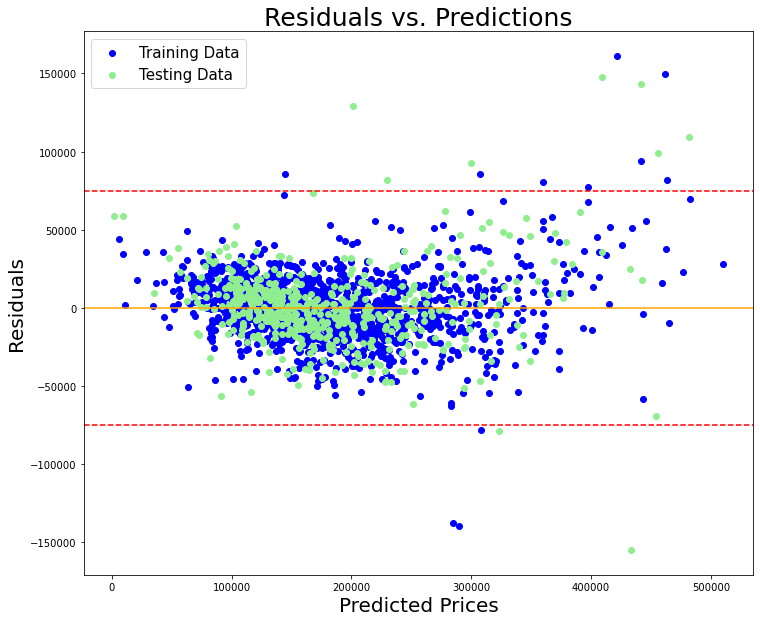

In [615]:
resids_preds_scatter(train_pred, train_resids, test_pred, test_resids, 75000)

__Interpretation:__ We can see that the variance is mostly uniform, but we do have some fanning as the prices increase, indicating that the are some issues with our model.

### Log Transformation

So, how does our model hold up? Pretty well - but we can actually make it better if we take our features and predict the log of the prices as opposed to the the prices themselves. Let's see how that transformation does.

#### Model

In [616]:
log_y = np.log(y)

X2_train, X2_test, y_log_train, y_log_test = train_test_split(X2, log_y, random_state  = 613, train_size = 0.75)

In [617]:
lr5 = LinearRegression()

lr5.fit(X2_train, y_log_train)

LinearRegression()

####  Logarithmic Regression Metrics

In [618]:
# Check our scores
printlr5.score(X2_train, y_log_train)

NameError: name 'printlr5' is not defined

In [ ]:
log_list1 = ["Training R2", "Testing R2", "Cross Validation Mean"]
log_list2 = [
    round(lr5.score(X2_train, y_log_train), 4),
    round(lr5.score(X2_test, y_log_test), 4),
    round(cross_val_score(lr5, X2_train, y_log_train, cv = 5).mean(), 4)
            ]
for position, i in enumerate(cross_val_score(lr5, X2_train, y_log_train, cv = 5)):
    log_list1.append(f"Cross Validation R2, Fold {position + 1}") 
    log_list2.append(round(i, 4))

log_df = pd.DataFrame(list(zip(log_list1, log_list2)), 
           columns =["Log Linear Regression", 'Score'])
log_df

Our Log transformed model has a coefficient of determination of 92% for the training data, and 93% for our testing data, our best score yet. Let's see how this model does. Since we transformed our model, some of our previous functions won't work, so we'll do it by hand.

In [ ]:
# get our predictions for train and test in logarithmic format
train_log_preds = lr5.predict(X2_train)
test_log_preds = lr5.predict(X2_test)

In [ ]:
# exponentiate all of our logarithmic targets and predictions
exp_train_preds = np.exp(train_log_preds)
exp_test_preds  = np.exp(test_log_preds)
exp_y_train     = np.exp(y_log_train)
exp_y_test      = np.exp(y_log_test)

In [ ]:
# Determine our residuals back in normal housing prices
exp_train_resids = exp_y_train - exp_train_preds
exp_test_resids  = exp_y_test  - exp_test_preds 

In [ ]:
def log_regression_metrics(resids, df, target)
    # set our sum of squared error
    rss = (resids**2).sum()
    # set up our mean absolute error
    mae = np.abs(resids).mean()
    # set up our mean squared error
    mse = rss/len(resids)
    # set up our root mean squared error
    rmse = np.sqrt(mse)
    # set up our coefficient of determination
    r_2 = model.score(df, target)
    list1 = ["Sum Squared Error","Mean Absolute Error", 
             "Mean Squared Error", "Root Mean Squared Error", "Coefficient of Determination"]
    list2 = [rss, mae, mse, rmse, r_2]
    # create a dataframe out of our 2 lists
    data = pd.DataFrame(list(zip(list1, list2)), 
               columns =["Metric", "Score"])

#### Logarithmic LINE Assumptions

In [ ]:
plot_predictions("Log Transformed Linear Regression Model 2",
                exp_train_preds,
                exp_test_preds,
                exp_y_train,
                exp_y_test,
                (12,10))

__Interpretation:__ As we can see, our model is fitting much better, with the predictions and actual sale prices fitting tightly around the line that represents our model.

In [ ]:
resids_hist(exp_train_resids, exp_test_resids)

__Interpretation:__ Our model is continuing to show signs of improvement as the residuals have more of a normal distribution.

In [ ]:
resids_preds_scatter(exp_train_preds, exp_train_resids, exp_test_preds, exp_test_resids, 100000)

__Interpretation:__ Our model now has more equivalence when it comes to the variance. We appear to have much more Homoscedasticity.

Since while the logarithmic function did work better, it's interpretability is less than ideal. So, we'll be using the model it's based on for our recommendations.

In [ ]:
# Create a dataframe with our column names and coefficients
log_trans = pd.DataFrame(zip(X2.columns, lr2.coef_),columns = ["Variable", "Coefficient"])
log_trans

## Conclusions

The housing market is in difficult times. With the market crash, it really has become a buyers market. Which means that flipping houses now could be more lucrative than ever - buy low, sell high. As the market bounces back, people are going to want better houses, and what those houses need in order to sell at high prices can sometimes not be worth it, or beyond your control. It's important to note that certain neighborhoods could get the short end of the stick in this deal. With lower ranges of prices, it won't be worth it for contractors to flip houses in those neighborhoods as they won't get as good of a return as they would in other neighborhoods. This could potentially lead to further economic disparities between the neighborhoods, which is an important ethical dillema. Simultaneously, some of the coefficients in our model were quite confusing and seemingly counter to what we would have thought, such as central air having a negative coefficient. It leads me to believe that more data is needed and that more models need to be constructed.

## Recommendations

Based on our model, if you want to know what to build and where to build here are some important tips:
1. Every additional square foot above ground in the house increases the house's value by \$48.
1. If you build an entirely new home, that will raise the price by \$17,000
1. Increasing the overall quality of the home by just 1 point raises the house price by nearly \$7,500
1. Increasing the overall condition of the home by just 1 point raises the house price by nearly \$5,000
1. Building a house on a hillside increases the value by \$11,000
1. Building near a positive neighborhood feature can increase the value by as much as \$13,000
1. Roofs: These slight changes can swing the value of the house by tens of thousands of dollars.
    - Don't build Mansard or shed styles
    - Use wooden shingles
1. If you are building a new house, be sure to use a slab, not poured concrete.

__There are so many features to consider, I recommend you hire our services right away so you can learn about them all, so you can save money and sell for more!!!!!__

## References

1. Our [Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
1. The [Kaggle](https://www.kaggle.com/c/dsi-us-12-project-2-regression-challenge?rvi=1) Competition.